In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [75]:
data=pd.read_excel(r"D:\DSBA\The course\18-DM-Nov 27- project\final project folder\Clustering Clean Ads_Data-2.xlsx")

In [76]:
data.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [142]:
data.shape

(23066, 19)

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [144]:
data.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [145]:
data.duplicated().sum()

0

In [49]:
data.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


### Treatment of missing values

In [77]:
data.CTR=data.CTR.fillna((data.Clicks/data.Impressions)*100)
data.CPM=data.CPM.fillna((data.Spend/data.Impressions)*1000)
data.CPC=data.CPC.fillna(data.Spend/data.Clicks)

In [78]:
data.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

#### Thus the missing values have been treated.

### Checking for outliers

In [50]:
df_num=data.select_dtypes(["int64",'float64'])
df_num.columns

Index(['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

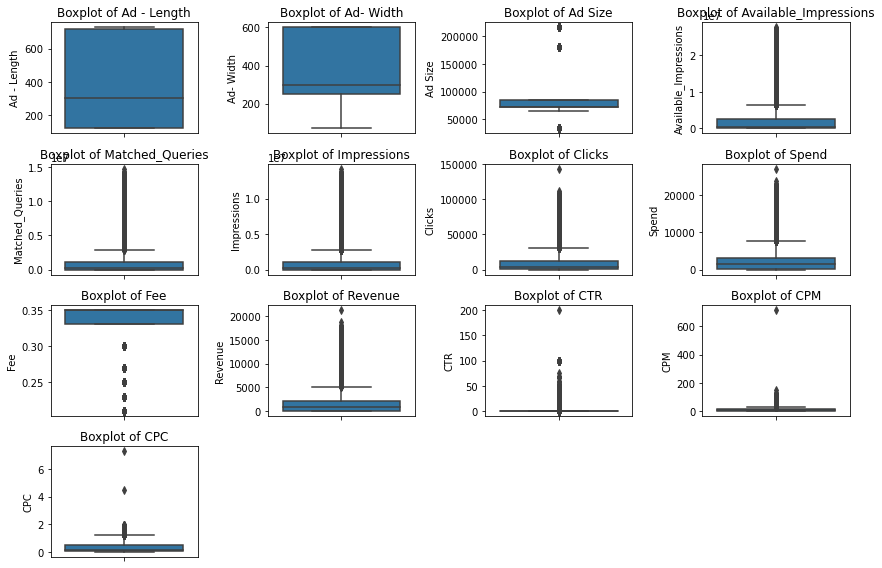

In [51]:
plt.figure(figsize = (12,8))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = df_num[feature_list[i]],)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Thus there are significant numbers of outliers present in the data

### treatment of outlier

In [79]:
def treat_outlier(x):
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    IQR=q75-q25
    ul=q75+1.5*IQR
    ll=q25-1.5*IQR
    return ll,ul

In [80]:
for i in df_num.columns:
       ll,ul=treat_outlier(df_num[i])
       df_num[i]=np.where(df_num[i]>ul,ul,df_num[i])
       df_num[i]=np.where(df_num[i]<ll,ll,df_num[i])

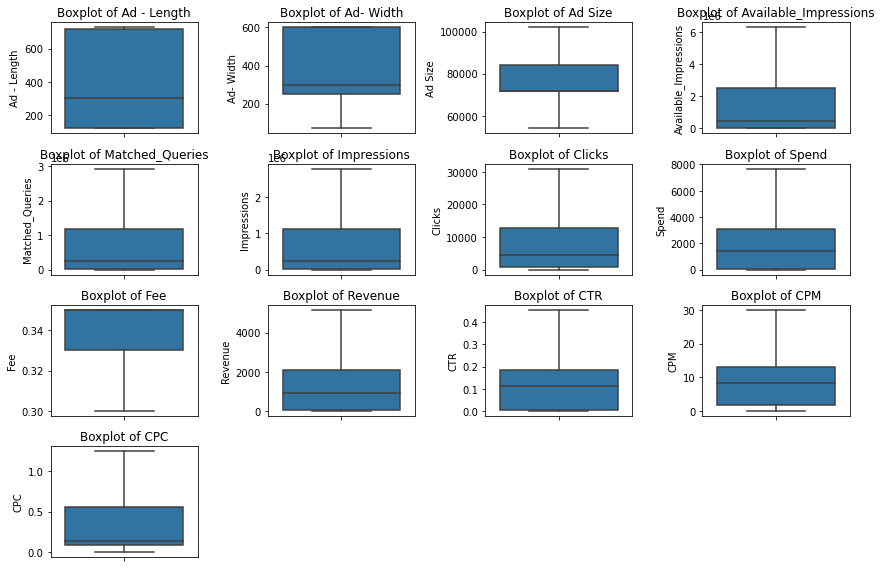

In [81]:
plt.figure(figsize = (12,8))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = df_num[feature_list[i]],)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Thus the outliers have been treated

### Standardize the data- performing the zscore

In [127]:
x=StandardScaler()
df_num_scaled=x.fit_transform(df_num)


In [129]:
round(pd.DataFrame(df_num_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,23066.00,23066.00,23066.00,23066.00,23066.00,23066.00,23066.00,23066.00,23066.00,23066.00,23066.00,23066.00,23066.00
mean,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.13,-1.32,-1.47,-0.76,-0.78,-0.77,-0.87,-0.89,-2.22,-0.88,-0.91,-1.19,-1.04
25%,-1.13,-0.43,-0.30,-0.74,-0.76,-0.76,-0.79,-0.86,-0.57,-0.85,-0.89,-0.94,-0.76
50%,-0.36,-0.19,-0.30,-0.53,-0.53,-0.54,-0.41,-0.31,0.54,-0.32,-0.18,0.02,-0.60
75%,1.43,1.29,0.48,0.43,0.37,0.37,0.47,0.39,0.54,0.39,0.28,0.70,0.69
max,1.47,1.29,1.65,2.19,2.07,2.06,2.36,2.27,0.54,2.24,2.03,3.16,2.87


#### Performing Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [130]:
wardlink=linkage(df_num_scaled,method='ward')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [21.25, 21.25, 63.75, 63.75],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [120.0, 120.0, 142.5, 142.5],
  [100.0, 100.0, 131.25, 131.25],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [212.5, 212.5, 250.0, 250.0],
  [173.75, 173.75, 231.25, 231.25],
  [115.625, 115.625, 202.5, 202.5],
  [42.5, 42.5, 159.0625, 159.0625],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [282.5, 282.5, 310.0, 310.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0,

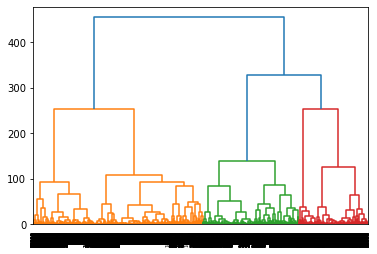

In [131]:
dendrogram(wardlink)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [21.25, 21.25, 71.25, 71.25]],
 'dcoord': [[0.0, 92.53880820127956, 92.53880820127956, 0.0],
  [0.0, 92.18058066596957, 92.18058066596957, 0.0],
  [0.0, 107.56854672589613, 107.56854672589613, 92.18058066596957],
  [92.53880820127956,
   252.69224653185861,
   252.69224653185861,
   107.56854672589613],
  [0.0, 138.07347322979695, 138.07347322979695, 0.0],
  [0.0, 126.15861985755565, 126.15861985755565, 0.0],
  [0.0, 253.0874557595643, 253.0874557595643, 126.15861985755565],
  [138.07347322979695,
   328.4204775370703,
   328.4204775370703,
   253.0874557595643],
  [252.69224653185861,
   455.1879125057543,
   455.1879125057543,
   328.4204775370703]],
 'ivl': ['(1150)',
  '(3096)',
  '(1683)',
  '(3619)',
  '(2142)',
  '(3540)',
  '(3055)',
  '(1253)',
  

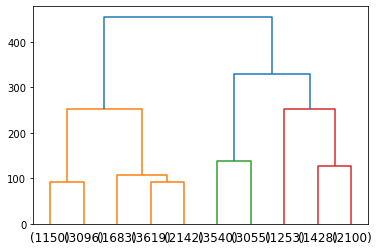

In [84]:
dendrogram(wardlink,p=10,truncate_mode='lastp')

In [57]:
data['cluster']=fcluster(wardlink,10,criterion='maxclust')
data.head().T

,0,1,2,3,4
Timestamp,2020-9-2-17,2020-9-2-10,2020-9-1-22,2020-9-3-20,2020-9-4-15
InventoryType,Format1,Format1,Format1,Format1,Format1
Ad - Length,300,300,300,300,300
Ad- Width,250,250,250,250,250
Ad Size,75000,75000,75000,75000,75000
Ad Type,Inter222,Inter227,Inter222,Inter228,Inter217
Platform,Video,App,Video,Video,Web
Device Type,Desktop,Mobile,Desktop,Mobile,Desktop
Format,Display,Video,Display,Video,Video
Available_Impressions,1806,1780,2727,2430,1218


In [170]:
data.groupby(['cluster']).mean()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
cluster,,,,,,,,,,,,,
1,720.000000,300.000000,216000.000000,1.618669e+05,9.172836e+04,7.735555e+04,9663.453913,857.231870,0.349461,559.035773,17.894926,14.779937,0.087789
2,720.000000,300.000000,216000.000000,2.745495e+05,1.489946e+05,1.266221e+05,15653.838501,1346.217393,0.349574,876.478714,0.124954,11.173004,0.090152
3,120.106952,599.792038,72001.782531,1.775857e+04,1.178686e+04,8.704396e+03,1347.852644,144.841557,0.350000,94.146994,19.750338,17.226015,0.091130
4,120.000000,600.000000,72000.000000,2.292643e+04,1.148400e+04,5.420406e+03,719.704891,67.124659,0.350000,43.630971,0.144576,13.252614,0.103556
5,252.521008,422.875817,93228.291317,1.686453e+05,1.076348e+05,8.950974e+04,12186.772176,1276.025159,0.347227,840.681134,1.031411,13.290151,0.100416
6,480.000000,70.000000,33600.000000,1.812522e+06,7.785642e+05,7.340956e+05,3845.645480,1339.154311,0.349960,870.588022,0.084952,1.840686,0.400646
7,357.374795,260.700491,84420.530278,2.340222e+06,1.274311e+06,1.237466e+06,3119.661211,2196.811689,0.345103,1445.863308,0.027305,1.841045,0.801936
8,141.835595,572.067039,75715.881883,8.787287e+05,6.207391e+05,5.238120e+05,71556.263368,7645.819425,0.278819,5532.487799,2.276044,15.215461,0.110385
9,728.000000,90.000000,65520.000000,1.712799e+07,9.168093e+06,8.824834e+06,16610.720588,14824.572878,0.242878,11319.582181,0.032655,1.723438,0.948981


In [58]:
p=data.cluster.value_counts().sort_index()
m=round(data.groupby('cluster').mean(),2)
m['freq']=p
m
data.drop(columns='cluster')

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.0031,0.0,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0000,0.0035,0.0,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.0028,0.0,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0000,0.0020,0.0,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0000,0.0041,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,100.0000,70.0,0.07
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,50.0000,20.0,0.04
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,100.0000,50.0,0.05
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,100.0000,70.0,0.07


### K-means calc

In [85]:
from sklearn.cluster import KMeans

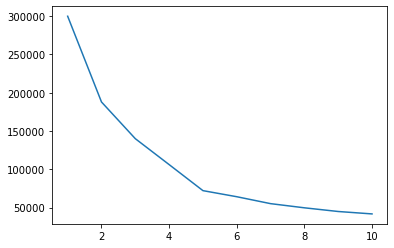

In [86]:
wss=[]
for i in range (1,11):
    k_means=KMeans(n_clusters=i)
    k_means.fit(df_num_scaled)
    wss.append(k_means.inertia_)

plt.plot(np.arange(1,11), wss)

### Thus from the visual depiction, it appears that ther are 5 clusters which yield maximum result
    

In [87]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [65]:
#calculating silhouette score for several clusters
for i in range (2,11):
    k_means=KMeans(n_clusters=i)
    k_means.fit(df_num_scaled)
    data['class']=k_means.labels_
    p=silhouette_score(df_num_scaled,data['class'])
    print("Silhouette score for {} clusters is".format(i))
    print(round(p,4))


Silhouette score for 2 clusters is
0.4032
Silhouette score for 3 clusters is
0.3455
Silhouette score for 4 clusters is
0.4033
Silhouette score for 5 clusters is
0.4802
Silhouette score for 6 clusters is
0.4761
Silhouette score for 7 clusters is
0.4688
Silhouette score for 8 clusters is
0.4317
Silhouette score for 9 clusters is
0.4201
Silhouette score for 10 clusters is
0.4365


#### Thus the silhouette score is highest for 5 clusters, indicating the optimum numbers of clusters

In [88]:
#data=data.drop(columns='cluster')
k_means=KMeans(n_clusters=5)
k_means.fit(df_num_scaled)
data['class']=k_means.labels_
silhouette_score(df_num_scaled,data['class'])

0.48020783078233054

In [89]:
data['sil']=silhouette_samples(df_num_scaled,data['class'])
data

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,class,sil
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,323,1,0.00,0.35,0.0000,0.0031,0.0,0.00,3,0.047715
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,285,1,0.00,0.35,0.0000,0.0035,0.0,0.00,3,0.047474
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,355,1,0.00,0.35,0.0000,0.0028,0.0,0.00,3,0.047927
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,...,495,1,0.00,0.35,0.0000,0.0020,0.0,0.00,3,0.048395
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,...,242,1,0.00,0.35,0.0000,0.0041,0.0,0.00,3,0.047092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,...,1,1,0.07,0.35,0.0455,100.0000,70.0,0.07,4,0.164325
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,...,2,1,0.04,0.35,0.0260,50.0000,20.0,0.04,4,0.261481
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,...,1,1,0.05,0.35,0.0325,100.0000,50.0,0.05,4,0.164142
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,...,1,1,0.07,0.35,0.0455,100.0000,70.0,0.07,0,0.410815


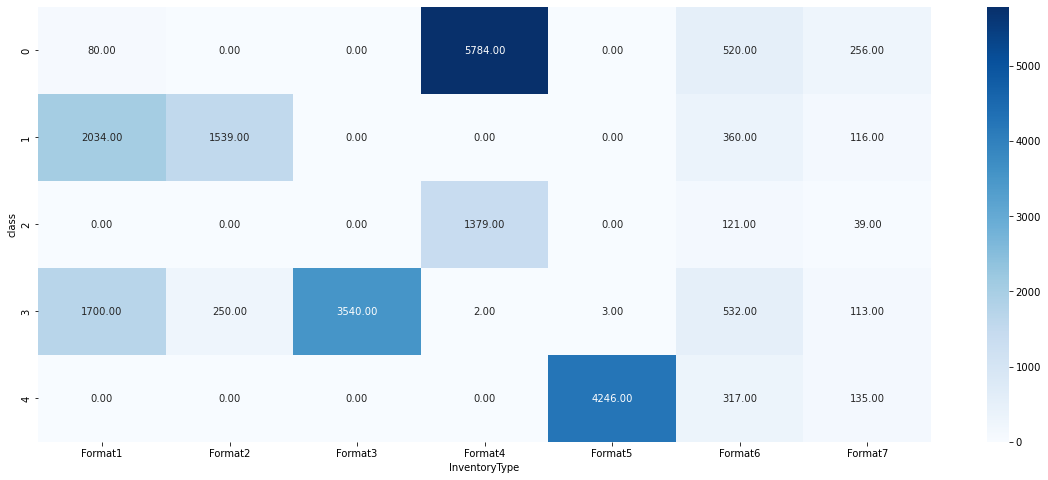

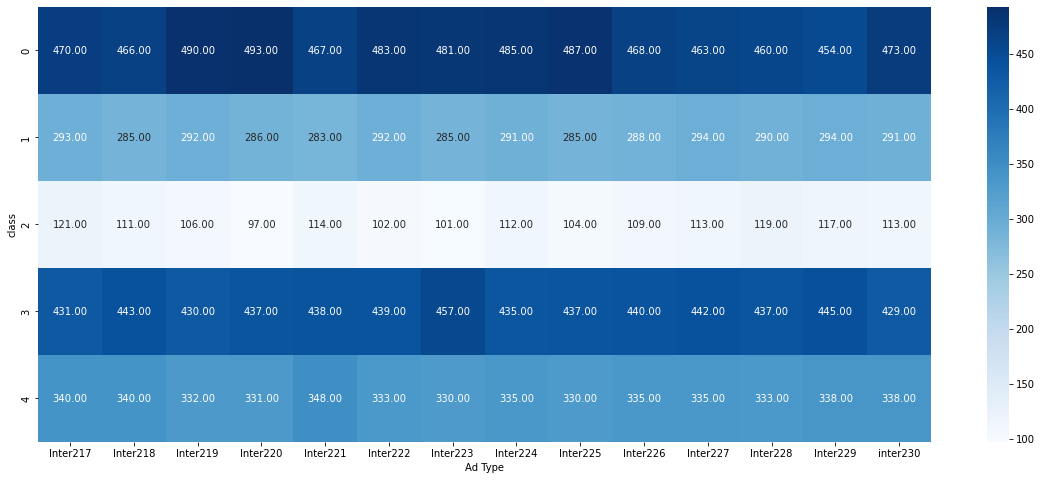

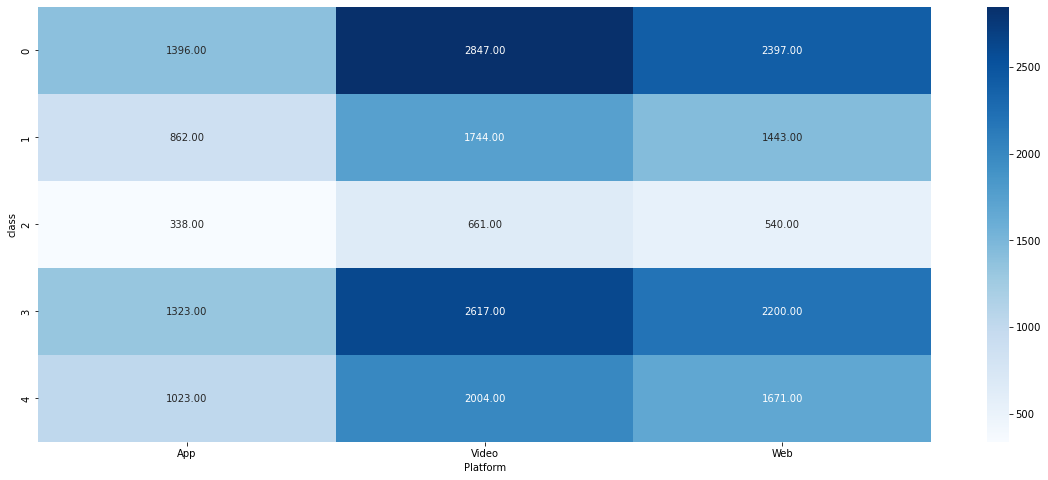

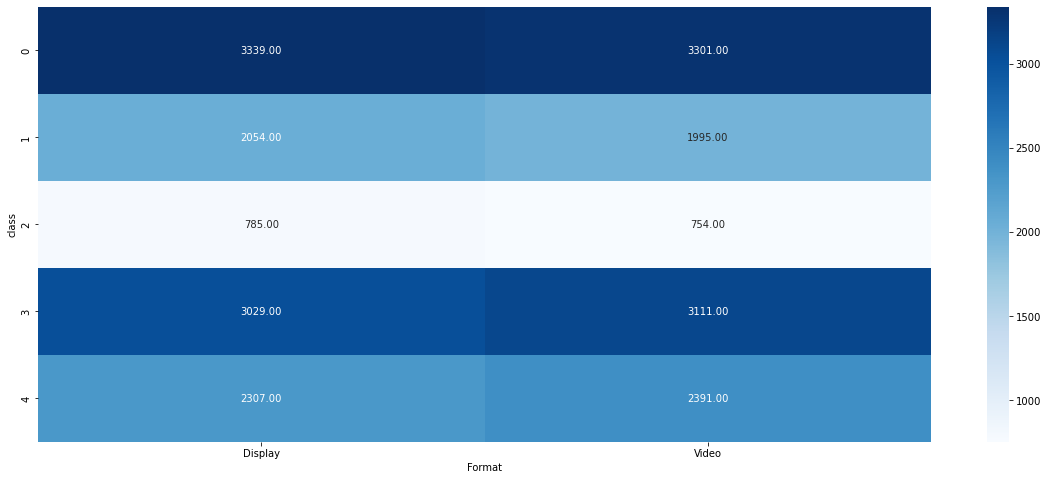

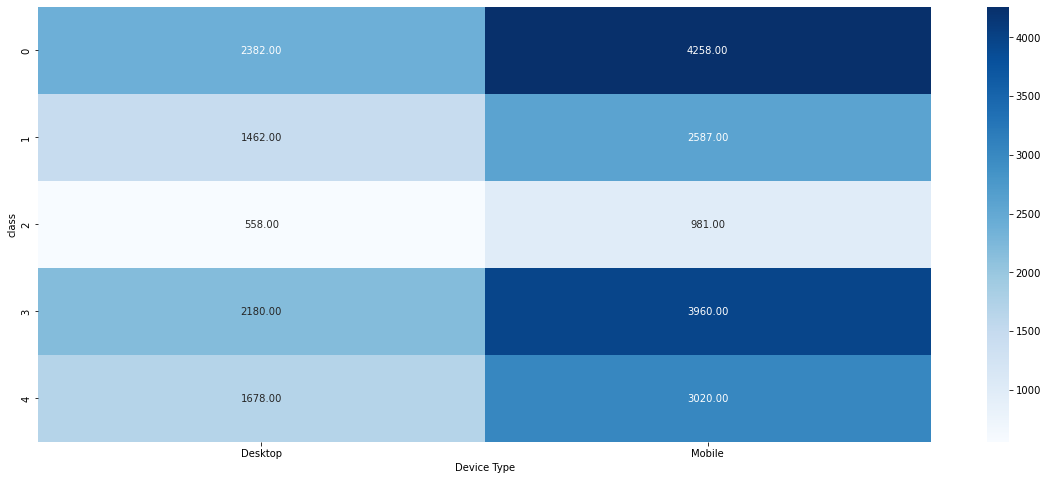

In [114]:
list1=["InventoryType","Ad Type","Platform","Format","Device Type"]
for i in range (len(list1)):
    #plt.subplot(4,1,i+1)
    plt.figure(figsize=(20,8))
    l=pd.crosstab(data["class"],data[list1[i]])
    sns.heatmap(l, annot=True, cmap="Blues", fmt='.2f')

### Conclusions:
#### Class vs format
Most of the ads classified as class “0” are of “format4” type
Most of the ads classified as class “1” are of “format1” followed by “format2” type
Most of the ads classified as class “2” are of “format4” type
Most of the ads classified as class “3” are of “format3” type
Most of the ads classified as class “4” are of “format5” type

Format4 is the most frequest format type followed by format5

#### Class vs ad-type
Ads categorized as different classes are mostly uniformly distributed across various ad-types

#### Class vs Display
Video is the most common platform of display for all the classes of ads followed by web.

#### Class vs format
Ads categorized as different classes are equally distributed as display and video format.

#### Class vs device type

All the classes of ads are twice more frequent in mobile over that in desktop















In [133]:
p=round(data.groupby(['class']).mean(),2)
p['freq']=data['class'].value_counts().sort_index()
p["Tot_Rev"]=round(data.groupby(['class'])["Revenue"].sum(),2)
p["Tot_spend"]=round(data.groupby(['class'])["Spend"].sum(),2)
p["Tot_MQ"]=round(data.groupby(['class'])["Matched_Queries"].sum(),2)
p["Tot_Impression"]=round(data.groupby(['class'])["Impressions"].sum(),2)
p

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,sil,freq,Tot_Rev,Tot_spend,Tot_MQ,Tot_Impression
class,,,,,,,,,,,,,,,,,,,
0,146.02,568.37,77139.76,36489.93,21813.34,15667.70,1888.46,210.05,0.35,136.56,5.33,14.45,0.10,0.51,6640,906772.83,1394750.84,144840571,104033554
1,465.88,199.21,75205.06,10396274.23,5630304.76,5451651.23,11254.00,8653.04,0.29,6378.68,0.03,1.57,0.76,0.47,4049,25827261.93,35036176.29,22797103991,22073735846
2,141.54,572.48,75680.31,805593.96,566390.27,477750.16,65260.28,6985.41,0.29,5013.79,2.21,15.39,0.11,0.63,1539,7716215.80,10750542.10,871674633,735257497
3,424.47,146.29,53525.08,1838271.98,878416.06,839871.07,3304.40,1524.05,0.35,993.10,0.06,1.81,0.55,0.42,6140,6097603.80,9357652.54,5393474600,5156808393
4,682.02,305.25,206058.75,262646.37,141690.73,120701.13,14363.41,1254.13,0.35,816.72,4.47,12.05,0.09,0.46,4698,3836949.89,5891906.37,665663043,567053932


In [132]:
p=round(data.groupby(['class']).mean(),2)
p['freq']=data['class'].value_counts().sort_index()
p

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,sil,freq
class,,,,,,,,,,,,,,,
0,146.02,568.37,77139.76,36489.93,21813.34,15667.70,1888.46,210.05,0.35,136.56,5.33,14.45,0.10,0.51,6640
1,465.88,199.21,75205.06,10396274.23,5630304.76,5451651.23,11254.00,8653.04,0.29,6378.68,0.03,1.57,0.76,0.47,4049
2,141.54,572.48,75680.31,805593.96,566390.27,477750.16,65260.28,6985.41,0.29,5013.79,2.21,15.39,0.11,0.63,1539
3,424.47,146.29,53525.08,1838271.98,878416.06,839871.07,3304.40,1524.05,0.35,993.10,0.06,1.81,0.55,0.42,6140
4,682.02,305.25,206058.75,262646.37,141690.73,120701.13,14363.41,1254.13,0.35,816.72,4.47,12.05,0.09,0.46,4698


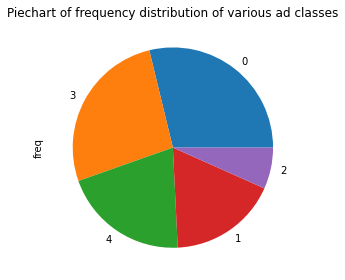

In [126]:

p['freq'].sort_values(ascending=False).plot.pie()
plt.title("Piechart of frequency distribution of various ad classes")
plt.tight_layout()

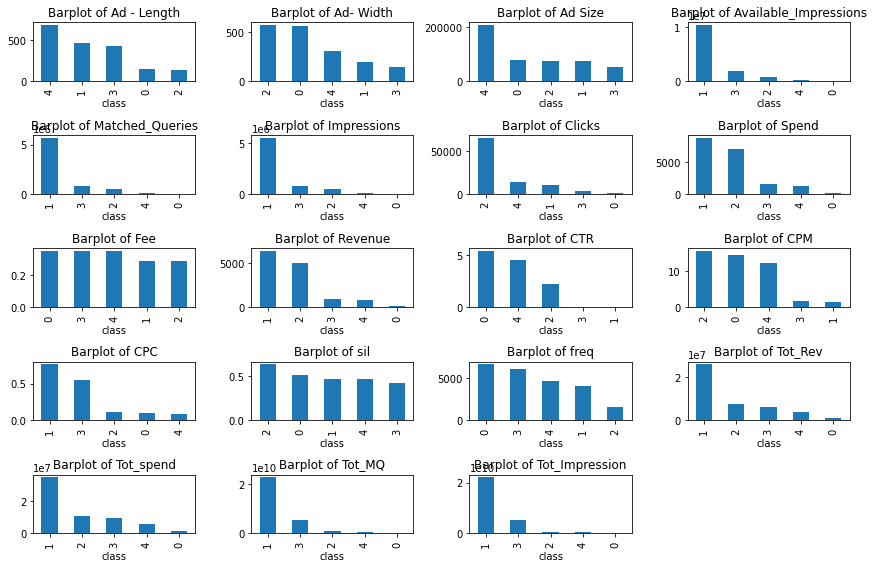

In [123]:
plt.figure(figsize=(12,8))
y=p.columns
for i in range(len (y)):
    plt.subplot(5,4,i+1)
    #plt.bar(p.index,p[y[i]])
    p[y[i]].sort_values(ascending=False).plot.bar()
    plt.title("Barplot of {}".format(y[i]))
    plt.tight_layout()

### Part 2 - PCA:

In [134]:
#Reading the data
pca=pd.read_excel(r"D:\DSBA\The course\18-DM-Nov 27- project\final project folder\PCA India Data_Census.xlsx")
#Checking the head
pca.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [326]:
#Checking the info
pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [327]:
#Checking the shape of the data
pca.shape

(640, 61)

In [328]:
#Checking for presence of any null
pca.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [329]:
#Checking for any duplicated data
pca.duplicated().sum()

0

In [135]:
#Summary of the data
round(pca.describe(include='all'), 2)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.00,640.00,640,640,640.00,640.00,640.00,640.00,640.00,640.00,...,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00
unique,NaN,NaN,35,635,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Uttar Pradesh,Raigarh,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,71,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,17.11,320.50,NaN,NaN,51222.87,79940.58,122372.08,12309.10,11942.30,13820.95,...,1392.97,2757.05,250.89,558.10,560.69,1293.43,71.38,200.74,510.01,704.78
std,9.43,184.90,NaN,NaN,48135.41,73384.51,113600.72,11500.91,11326.29,14426.37,...,1489.71,2788.78,453.34,1117.64,762.58,1585.38,107.90,309.74,610.60,910.21
min,1.00,1.00,NaN,NaN,350.00,391.00,698.00,56.00,56.00,0.00,...,4.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00
25%,9.00,160.75,NaN,NaN,19484.00,30228.00,46517.75,4733.75,4672.25,3466.25,...,489.50,957.25,47.00,109.00,136.50,298.00,14.00,43.00,161.00,220.50
50%,18.00,320.50,NaN,NaN,35837.00,58339.00,87724.50,9159.00,8663.00,9591.50,...,949.00,1928.00,114.50,247.50,308.00,717.00,35.00,113.00,326.00,464.50
75%,24.00,480.25,NaN,NaN,68892.00,107918.50,164251.75,16520.25,15902.25,19429.75,...,1714.00,3599.75,270.75,568.75,642.00,1710.75,79.00,240.00,604.50,853.50


## Perform detailed Exploratory analysis 

#### (i) Which state has highest gender ratio and which has the lowest? 

In [137]:
pca["Gender ratio"]=pca.TOT_M/pca.TOT_F
#selecting highest gender ratio
pca[pca["Gender ratio"]==pca["Gender ratio"].max()].State
print(" Thus Lakshadweep was having the highest gender ratio of {}".format(round(pca["Gender ratio"].max(),2)))
#selecting highest gender ratio
pca[pca["Gender ratio"]==pca["Gender ratio"].min()].State
print(" Thus Andhra Pradesh was having the lowest gender ratio of {}".format(round(pca["Gender ratio"].min(),2)))


 Thus Lakshadweep was having the highest gender ratio of 0.87
 Thus Andhra Pradesh was having the lowest gender ratio of 0.44


Text(0.5, 1.0, 'Barplot of States with Gender ratio')

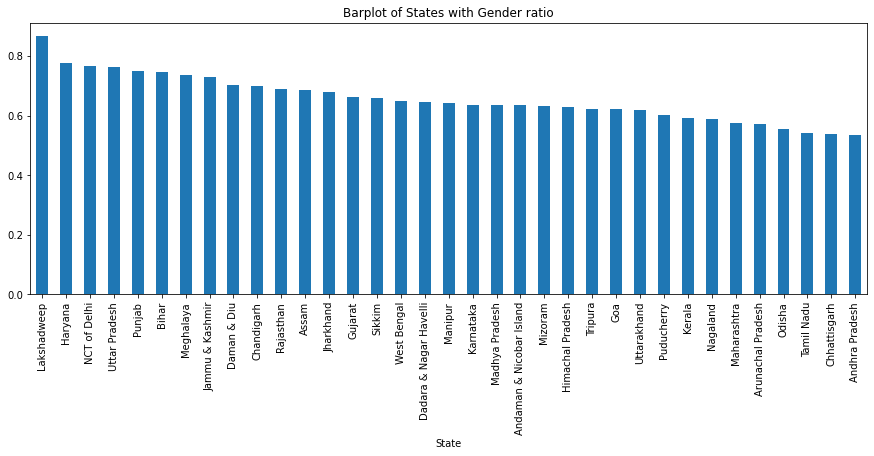

In [9]:
plt.figure(figsize=(15,5))
pca.groupby(["State"])["Gender ratio"].mean().sort_values(ascending=False).plot.bar()
plt.title("Barplot of States with Gender ratio")

#### (ii) Which district has the highest & lowest gender ratio? (Example Questions).

In [363]:

#selecting highest gender ratio
pca[pca["Gender ratio"]==pca["Gender ratio"].max()][['Dist.Code','Area Name']]


,Dist.Code,Area Name
586,587,Lakshadweep


In [364]:
print(" Thus Lakshadweep having District code 587 was having the highest gender ratio of {}".format(round(pca["Gender ratio"].max(),2)))


 Thus Lakshadweep having District code 587 was having the highest gender ratio of 0.87


In [365]:
#selecting highest gender ratio
pca[pca["Gender ratio"]==pca["Gender ratio"].min()][['Dist.Code','Area Name']]


,Dist.Code,Area Name
546,547,Krishna


In [366]:
print(" Thus Krishna Area having District code 547 was having the lowest gender ratio of {}".format(round(pca["Gender ratio"].min(),2)))


 Thus Krishna Area having District code 547 was having the lowest gender ratio of 0.44


Text(0.5, 1.0, 'Barplot of Districts with Gender ratio')

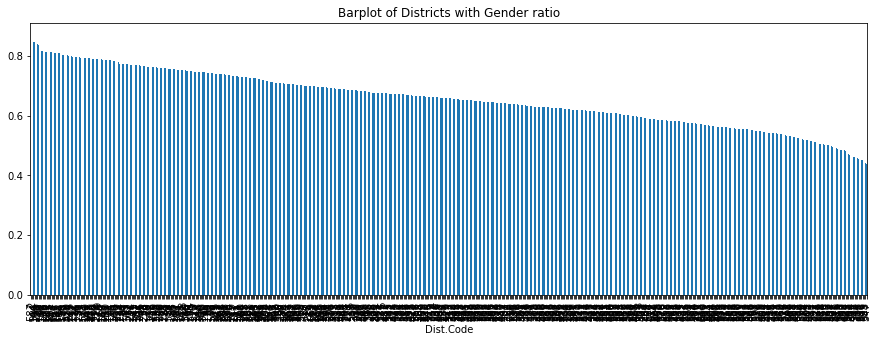

In [596]:
plt.figure(figsize=(15,5))
pca.groupby(["Dist.Code"])["Gender ratio"].mean().sort_values(ascending=False).plot.bar()
plt.title("Barplot of Districts with Gender ratio")

In [142]:
plt.figure(figsize=(15,5))
df=pd.DataFrame(pca.groupby(["Dist.Code"])["Gender ratio","Area Name"].mean().sort_values(by="Gender ratio",ascending=False))
round(df.tail(),2)

,Gender ratio
Dist.Code,
391,0.45
546,0.45
625,0.45
398,0.44
547,0.44


<Figure size 1080x360 with 0 Axes>

In [143]:
list_=['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06']
dict_={'No_HH':"No of Household", 'TOT_M':"Total population Male", 'TOT_F': "Total population Female", 'M_06': "Population in the age group 0-6 Male", 'F_06':
      "Population in the age group 0-6 Female"}



#### Pick 5 variables out of the given 24 variables below for EDA:

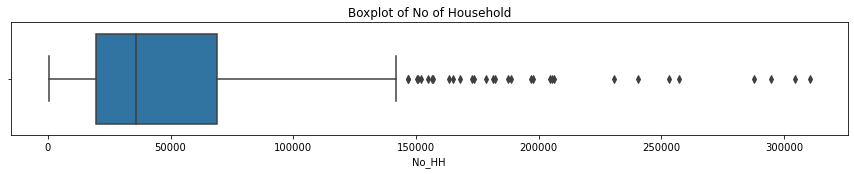

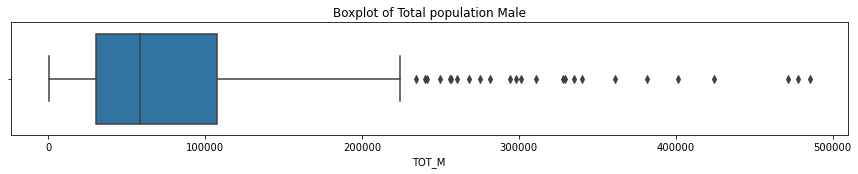

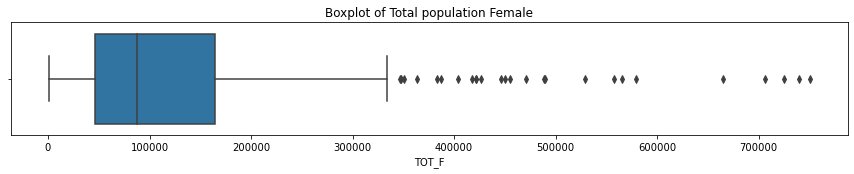

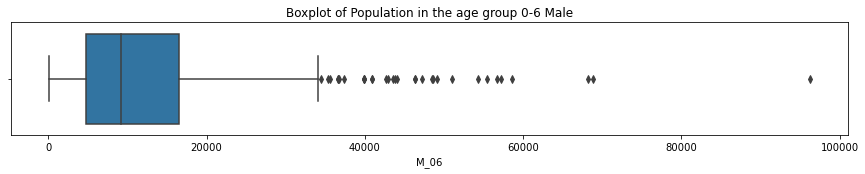

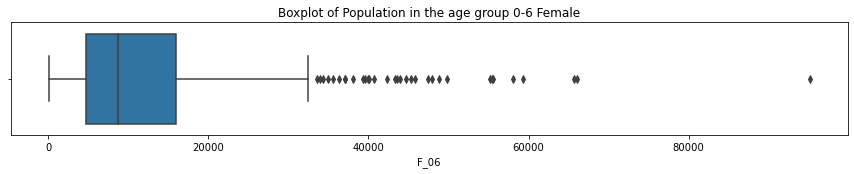

In [11]:
list_=['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06']
dict_={'No_HH':"No of Household", 'TOT_M':"Total population Male", 'TOT_F': "Total population Female", 'M_06': "Population in the age group 0-6 Male", 'F_06':
      "Population in the age group 0-6 Female"}
for i in range(len(list_)) :
    plt.figure(figsize=(15,12))
    plt.subplot(5,1,i+1)
    sns.boxplot(pca[list_[i]])
    plt.title("Boxplot of {}".format(dict_[list_[i]]))
    
    

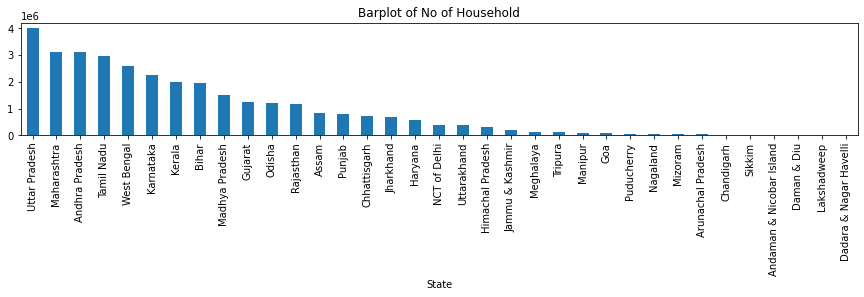

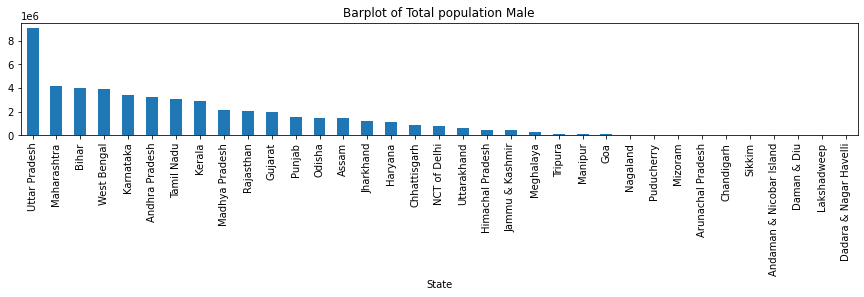

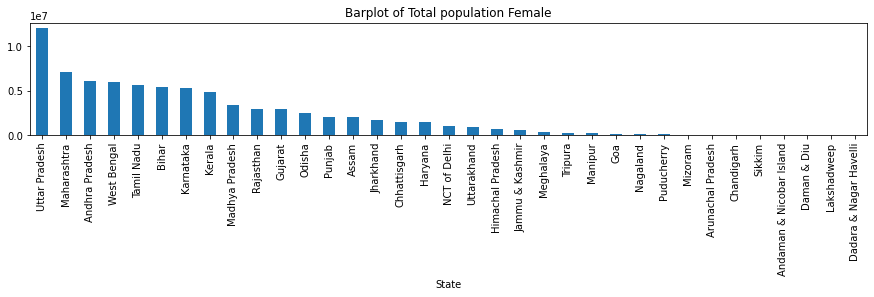

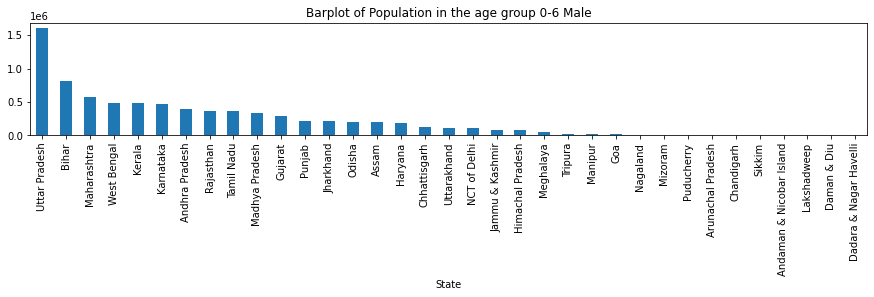

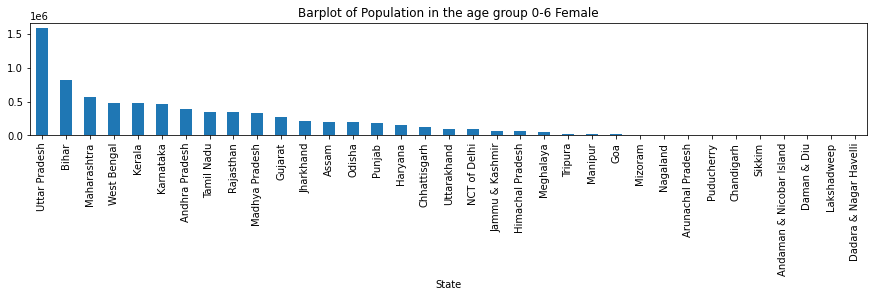

In [575]:

list_=['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06']
dict_={'No_HH':"No of Household", 'TOT_M':"Total population Male", 'TOT_F': "Total population Female", 'M_06': "Population in the age group 0-6 Male", 'F_06':
      "Population in the age group 0-6 Female"}

for i in range(len(list_)) :
    plt.figure(figsize=(15,12))
    plt.subplot(5,1,i+1)
    pca.groupby(['State'])[list_[i]].sum().sort_values(ascending=False).plot.bar()
    #sns.distplot(pca[list_[i]], )
    plt.title("Barplot of {}".format(dict_[list_[i]]))
    
    

In [12]:
pca_num=pca.select_dtypes(['int64']).drop(columns= ['State Code','Dist.Code'])

In [28]:
dictionary_=pd.read_excel(r"D:\DSBA\The course\18-DM-Nov 27- project\final project folder\PCA India Data_Census.xlsx",sheet_name='dictionary')
dictionary=dict(zip(dictionary_.Name,dictionary_.Description))

### Checking presence of outlier

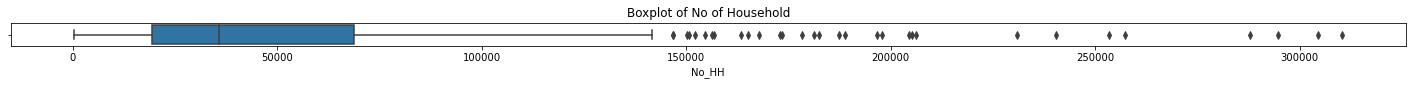

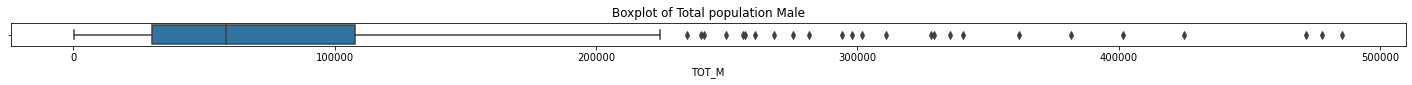

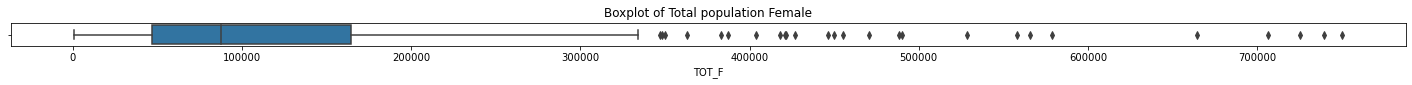

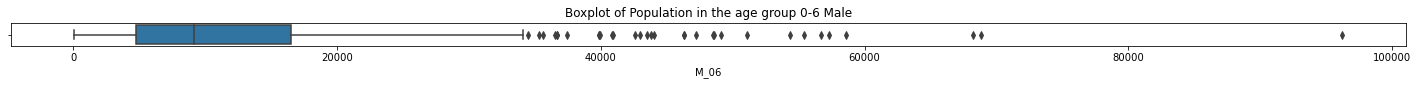

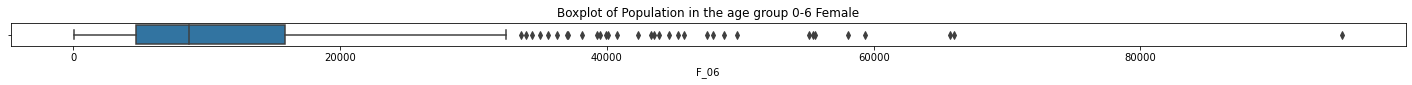

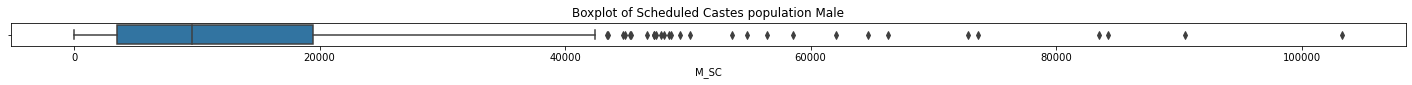

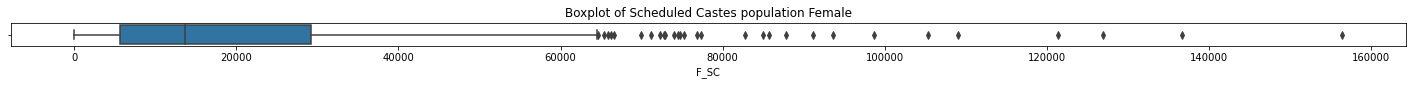

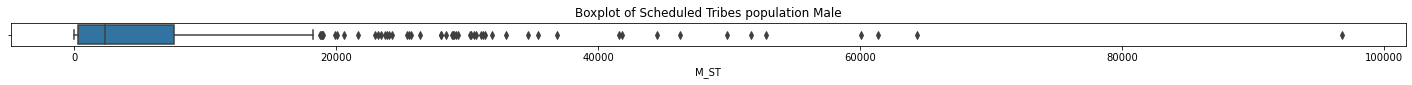

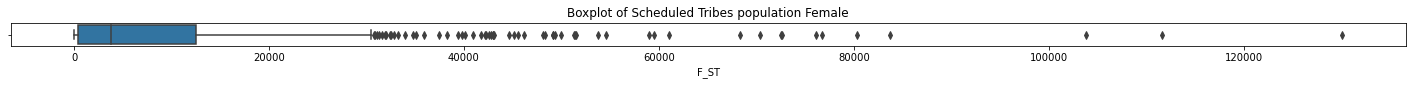

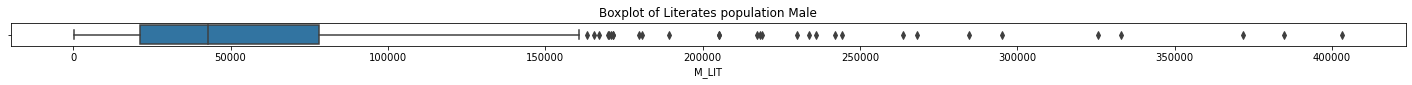

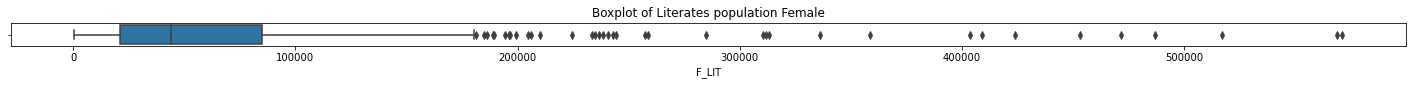

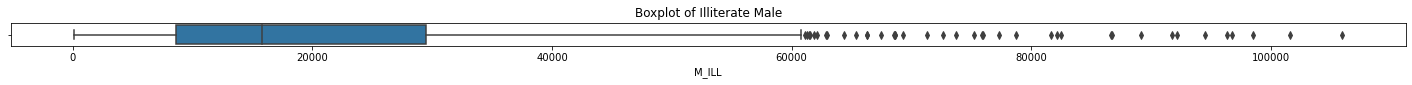

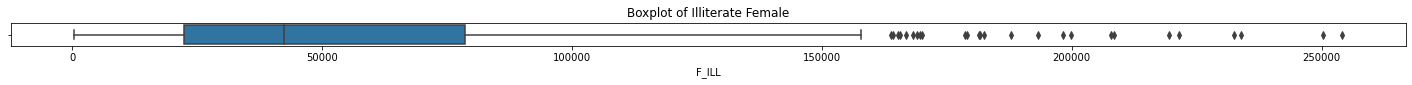

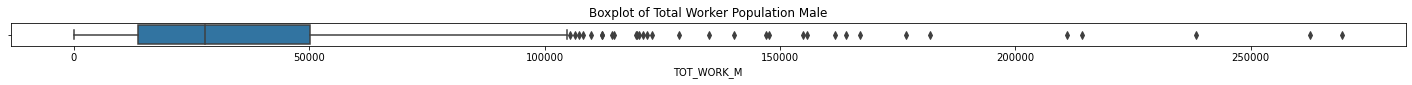

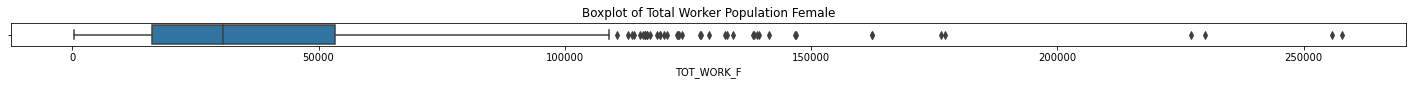

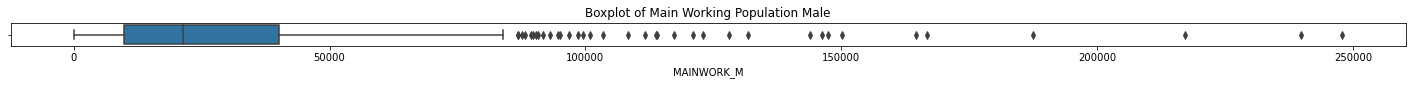

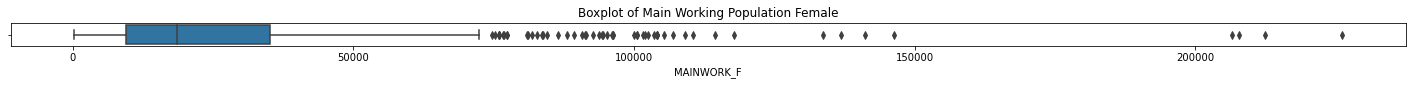

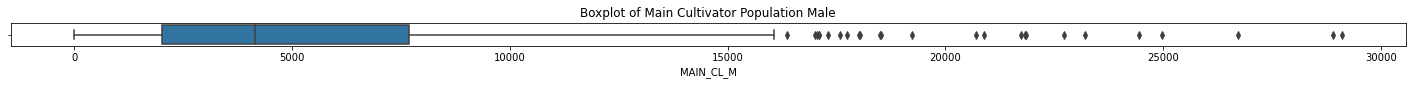

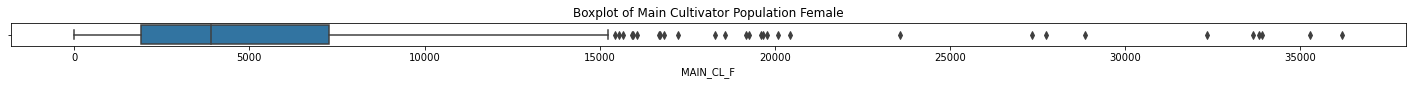

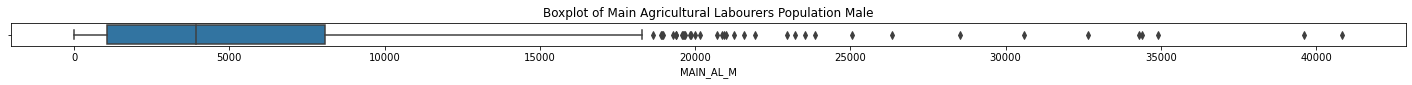

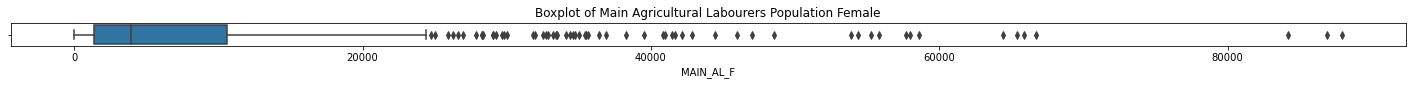

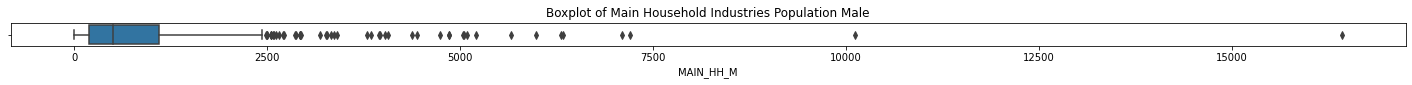

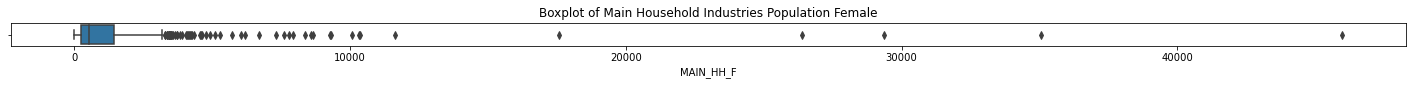

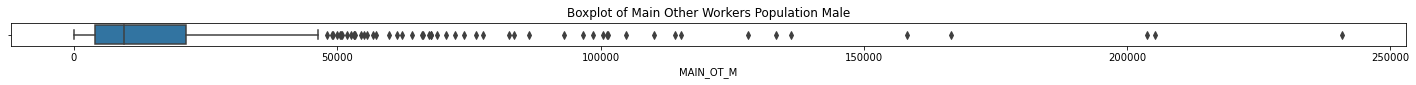

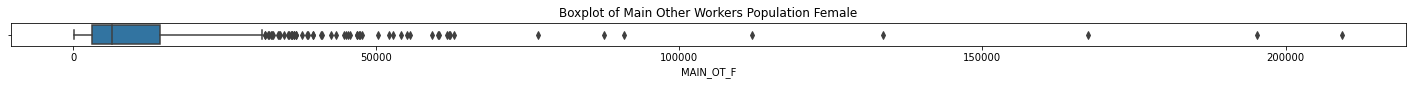

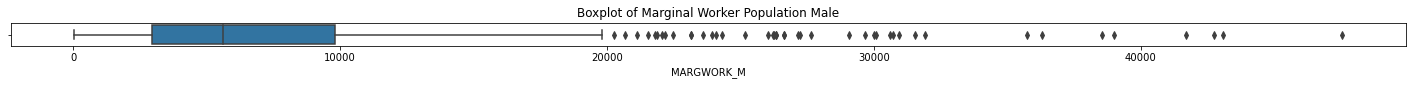

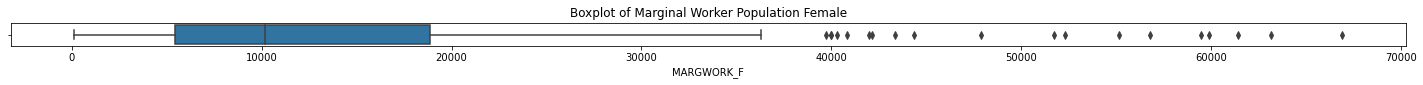

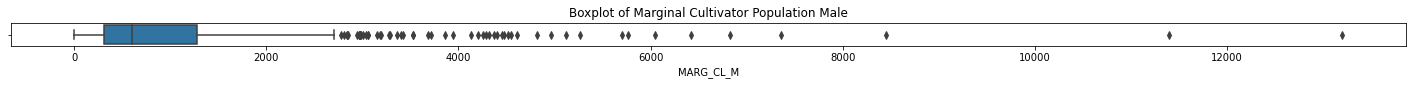

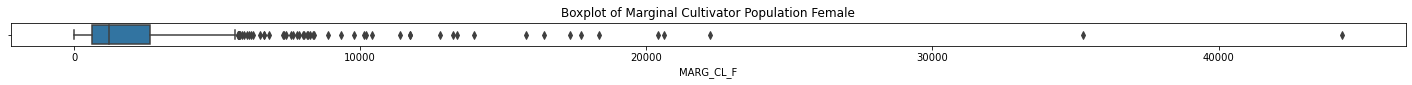

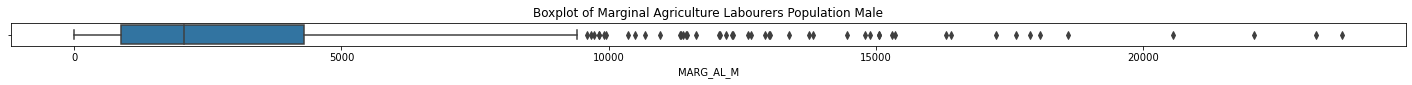

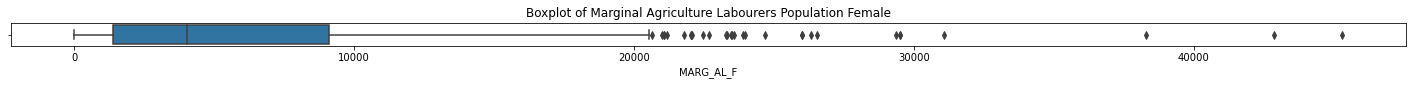

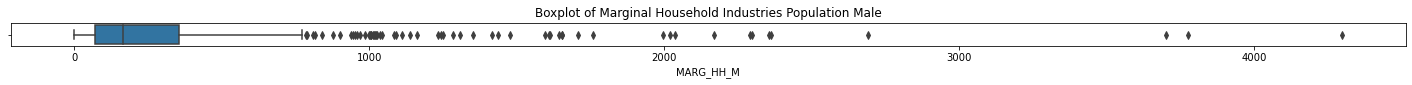

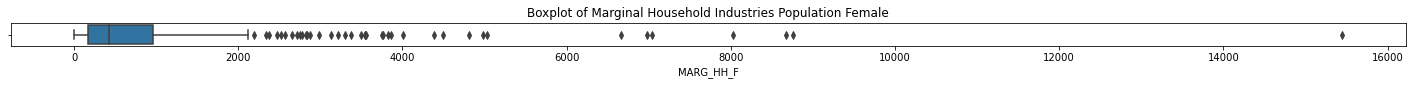

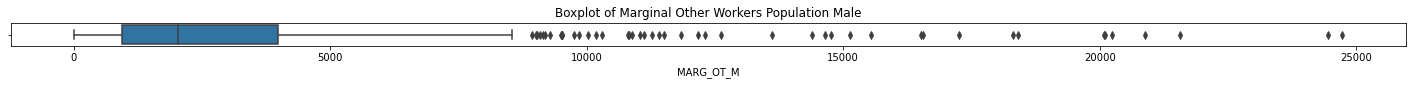

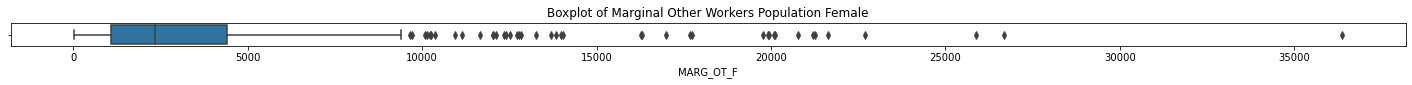

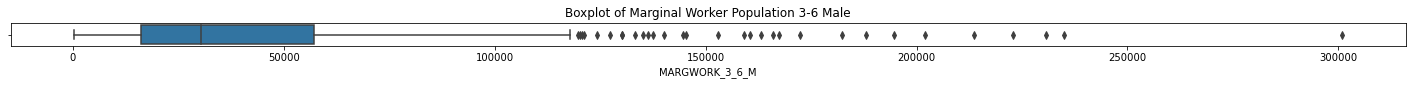

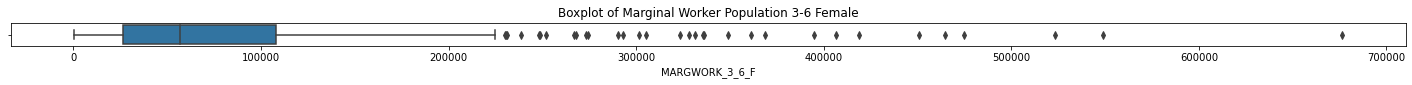

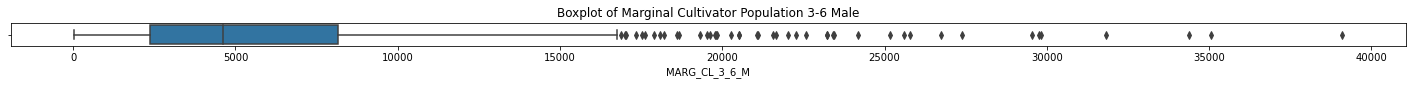

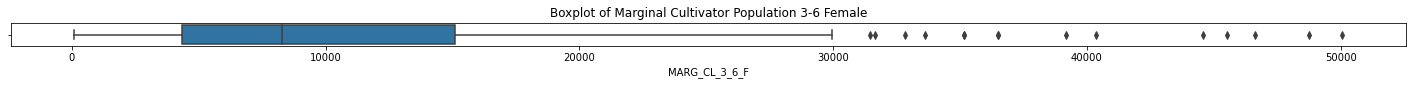

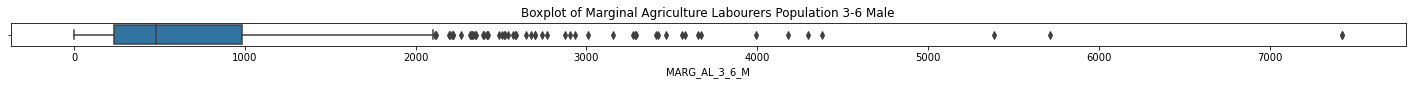

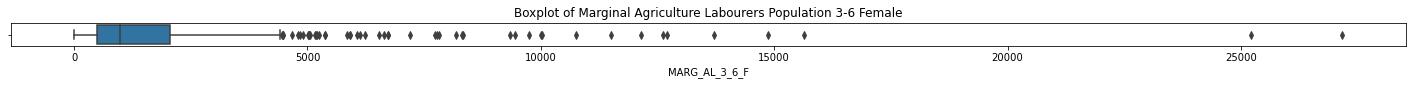

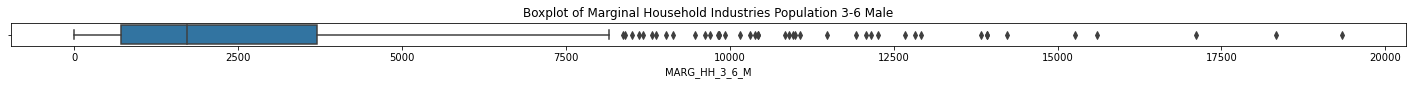

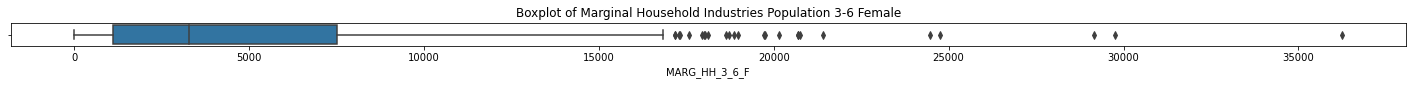

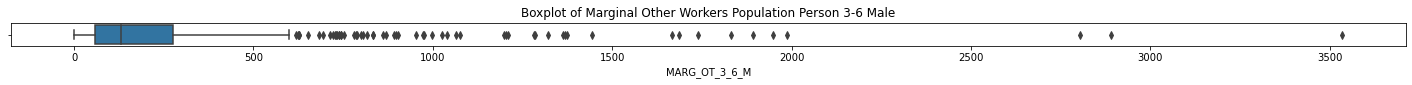

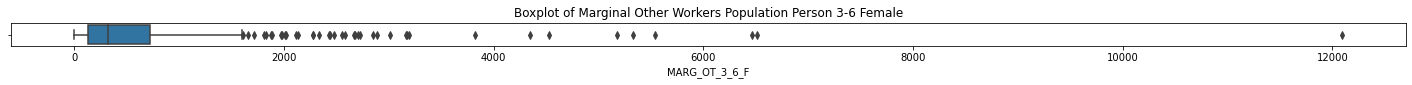

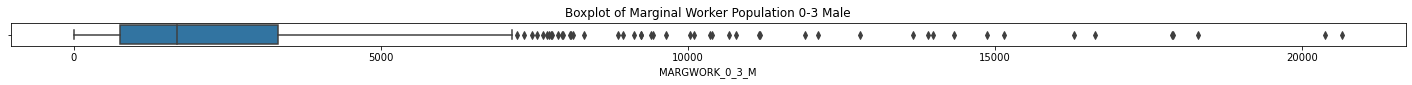

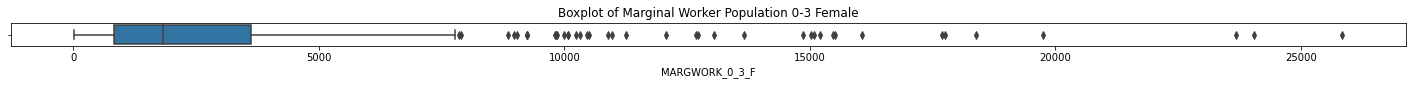

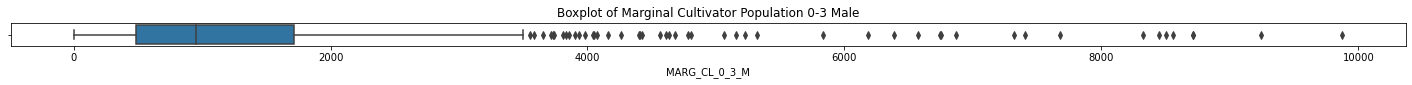

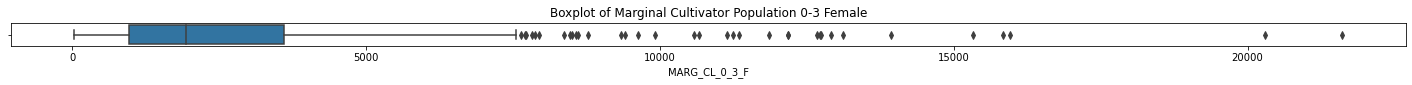

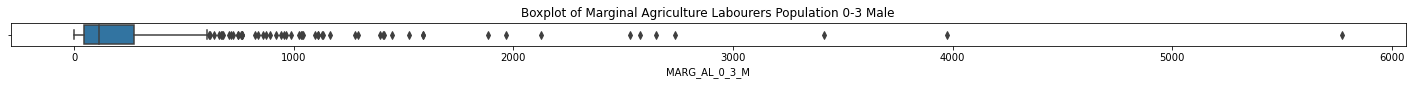

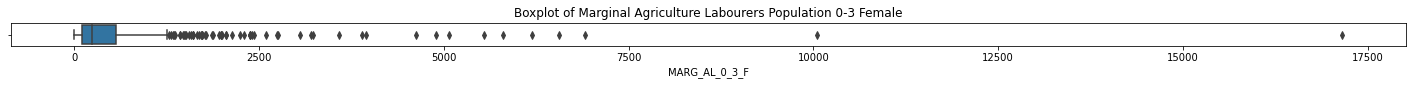

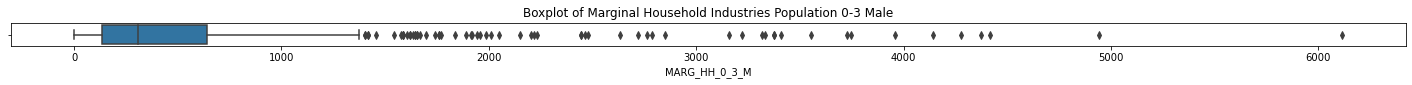

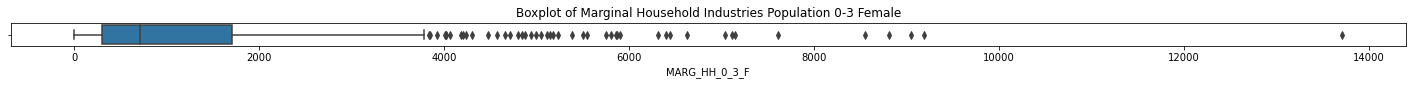

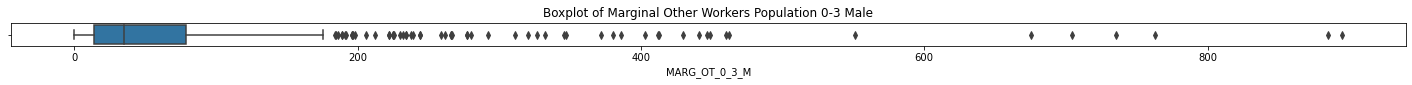

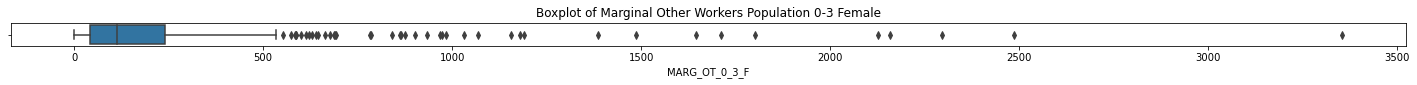

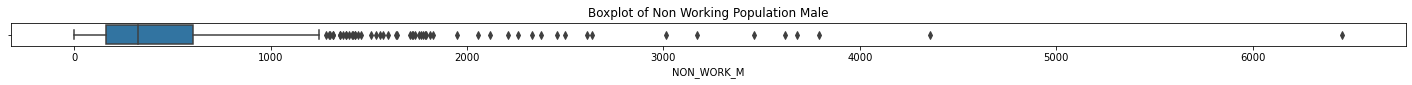

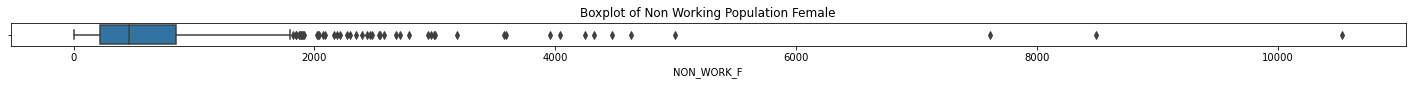

In [146]:
x=['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST',
       'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F',
       'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M',
       'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F',
       'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M',
       'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F',
       'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F',
       'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F',
       'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F',
       'MARG_CL_0_3_M', 'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F',
       'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F',
       'NON_WORK_M', 'NON_WORK_F']
for i in range (len (x)) :
    plt.figure(figsize=(25,30))
    plt.subplot(60,1,i+1)
    sns.boxplot(pca_num[x[i]])
    plt.title('Boxplot of {}'.format(dictionary[x[i]]))

Thus boxplot suggests that there are significant outliers present in the data. It is strongly believed that outlier treatment is necessary before performing Principal Component Analysis because PCA essentially computed using the covariance matrix which uses mean and the mean is subjected to skewness due to presence of outliers in the data.

### scaling the data

In [149]:
from scipy.stats import zscore
pca_num_scaled=pca_num.apply(zscore)
round(pca_num_scaled.head(),2)

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.90,-0.77,-0.82,-0.56,-0.51,-0.96,-0.96,-0.42,-0.48,-0.80,...,-0.16,-0.72,-0.16,-0.29,0.16,-0.66,-0.37,-0.50,-0.41,-0.54
1,-0.94,-0.82,-0.87,-0.68,-0.73,-0.96,-0.96,-0.58,-0.61,-0.85,...,-0.58,-0.73,-0.28,-0.29,-0.49,-0.72,0.04,-0.07,-0.61,-0.60
2,-0.97,-1.00,-0.98,-0.98,-0.97,-0.96,-0.96,-0.04,-0.03,-0.96,...,-0.86,-0.92,-0.46,-0.42,-0.73,-0.80,-0.66,-0.64,-0.73,-0.71
3,-1.04,-1.05,-1.04,-1.02,-1.00,-0.96,-0.96,-0.36,-0.39,-1.00,...,-0.81,-0.90,-0.42,-0.39,-0.72,-0.78,-0.62,-0.62,-0.65,-0.71
4,-0.82,-0.81,-0.81,-0.62,-0.65,-0.96,-0.96,0.15,0.04,-0.80,...,-0.35,-0.30,0.47,0.43,-0.47,-0.63,-0.44,-0.31,-0.54,-0.25


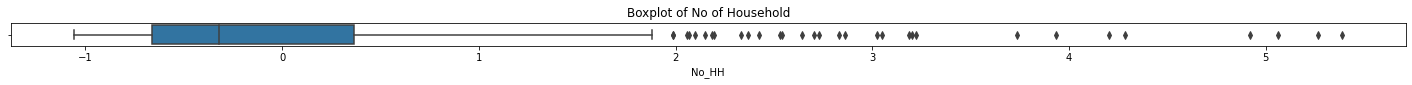

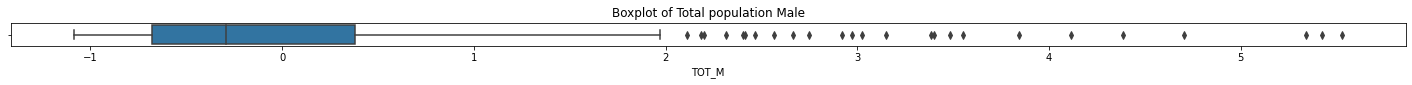

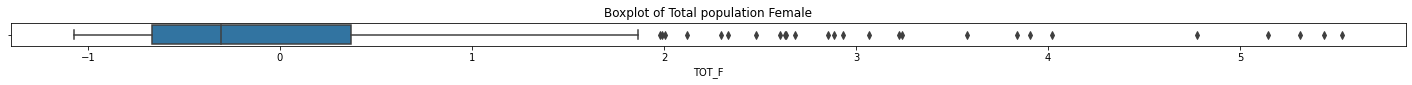

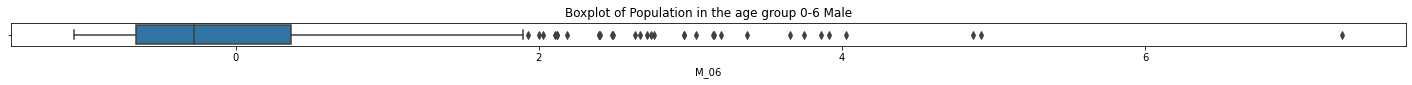

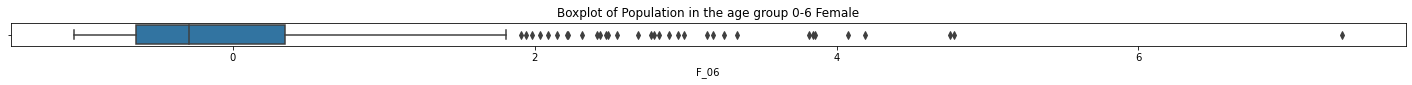

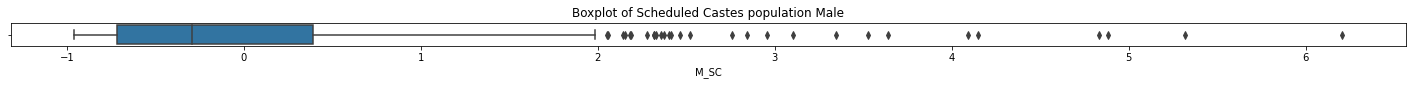

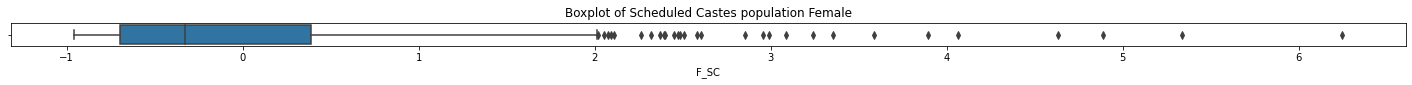

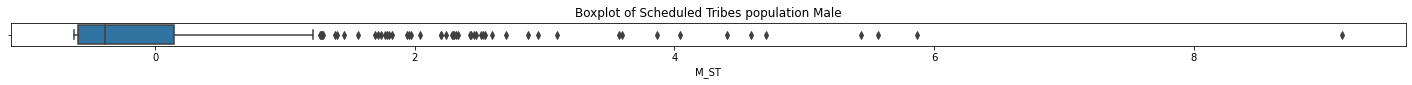

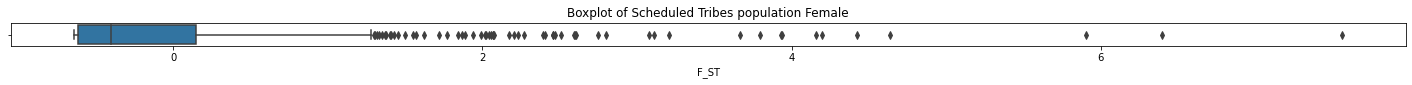

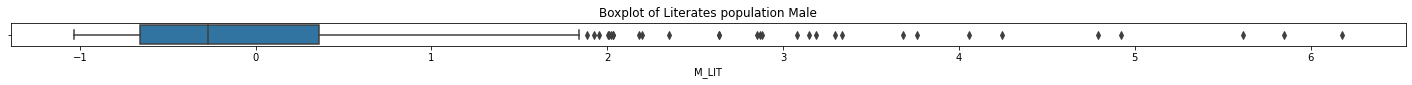

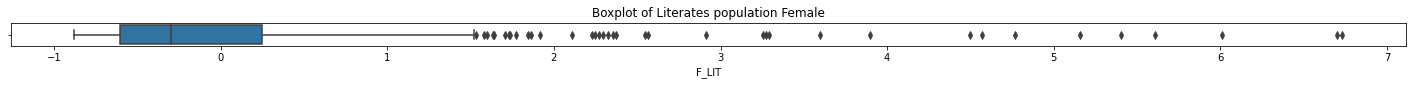

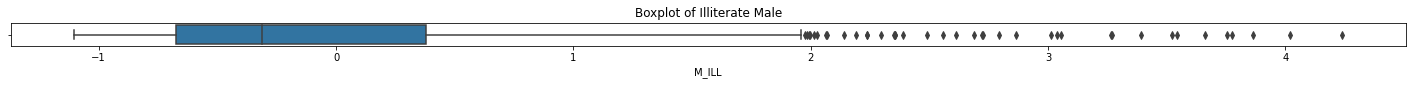

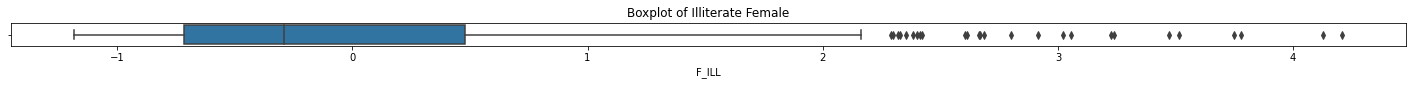

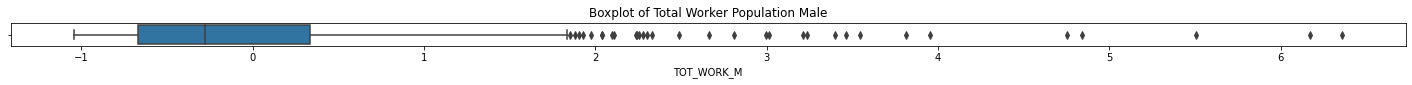

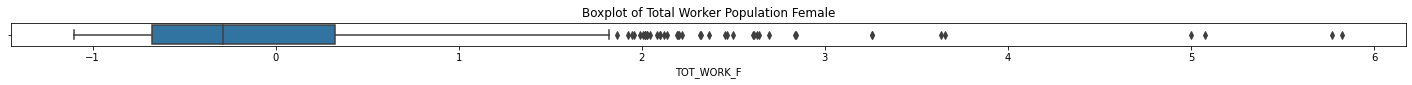

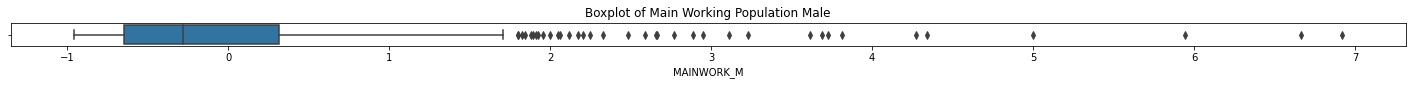

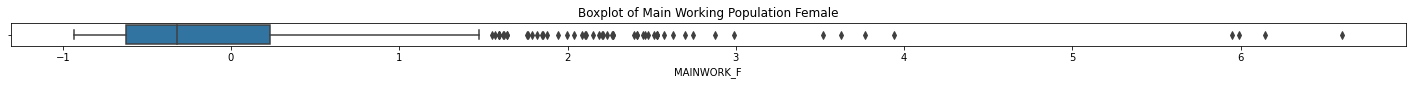

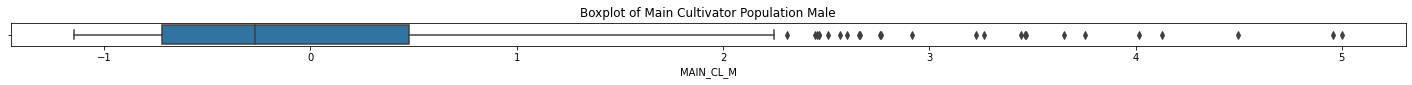

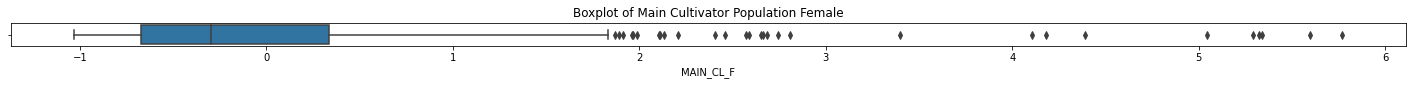

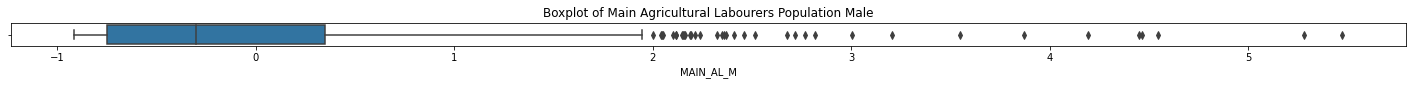

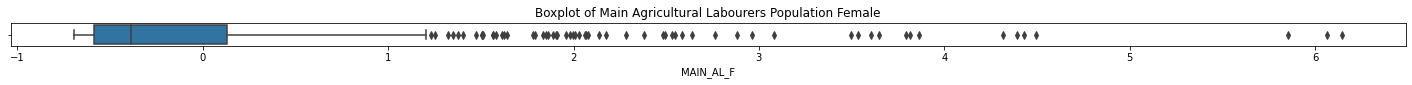

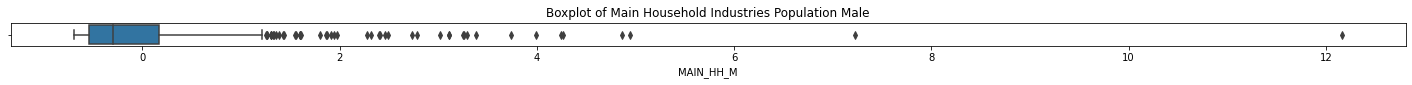

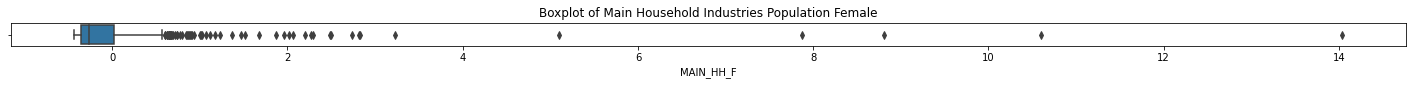

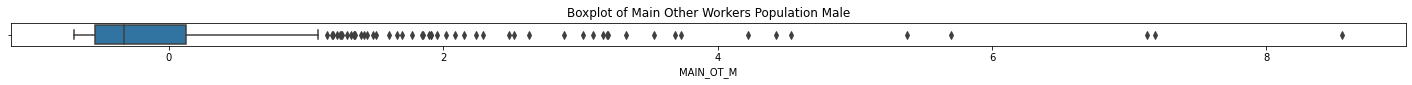

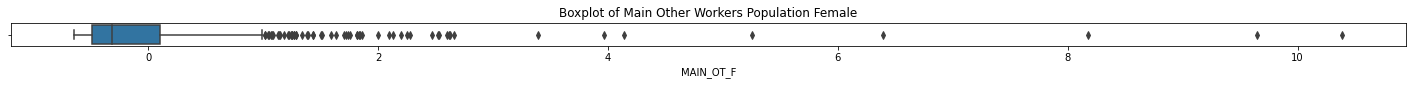

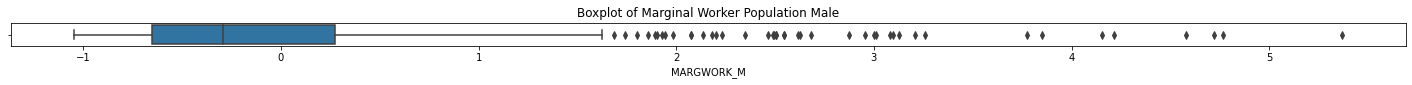

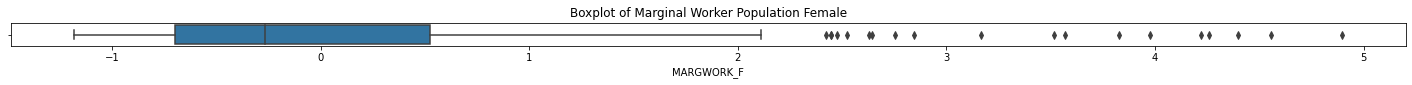

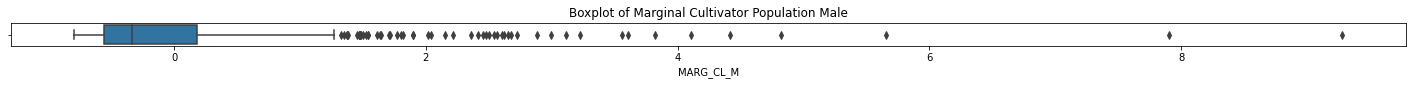

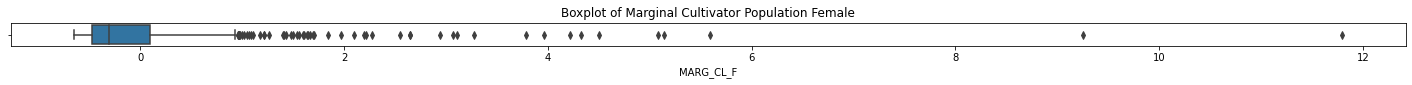

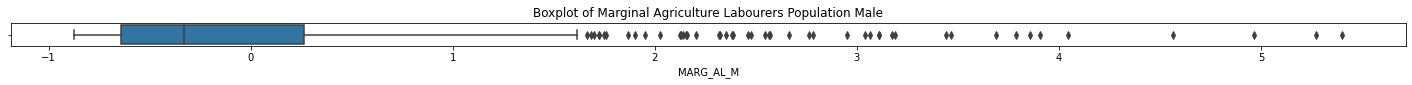

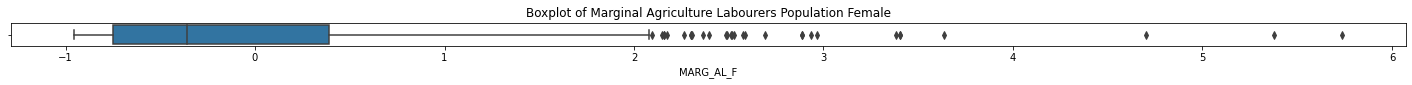

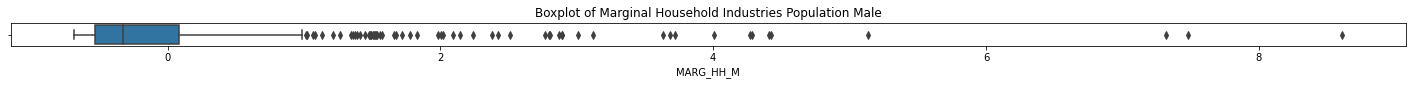

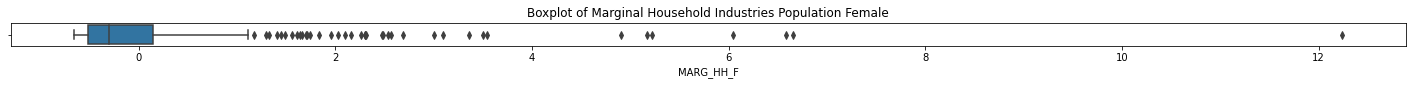

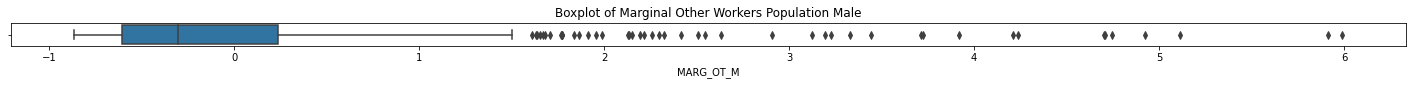

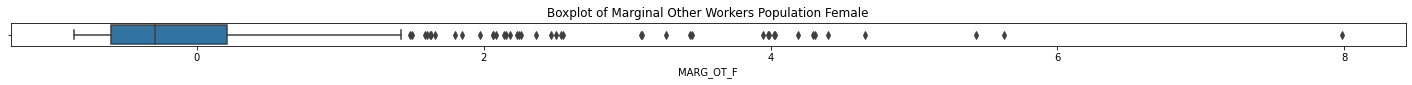

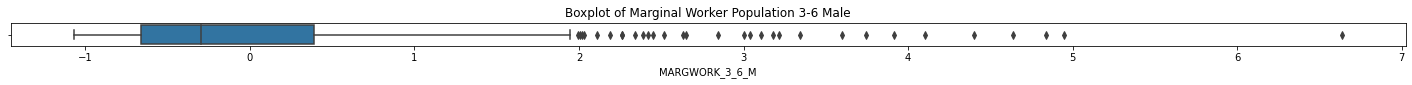

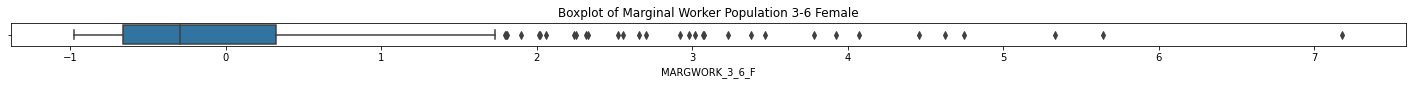

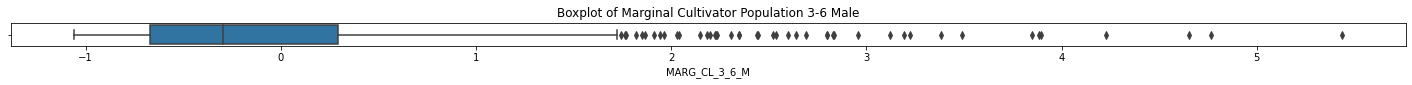

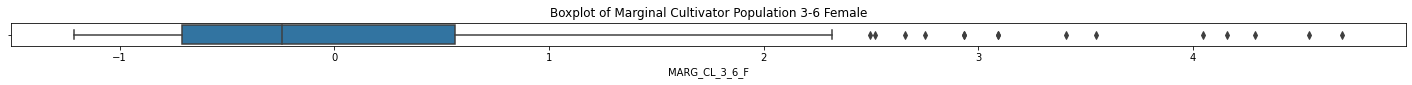

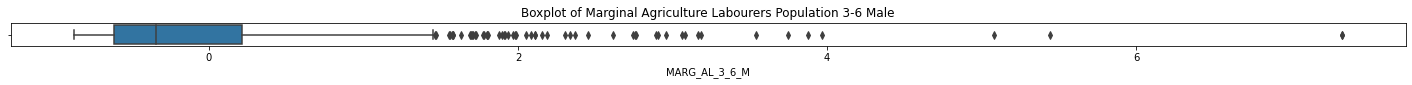

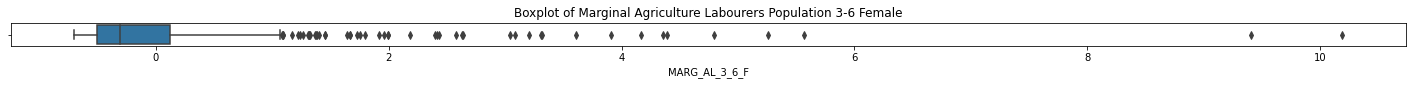

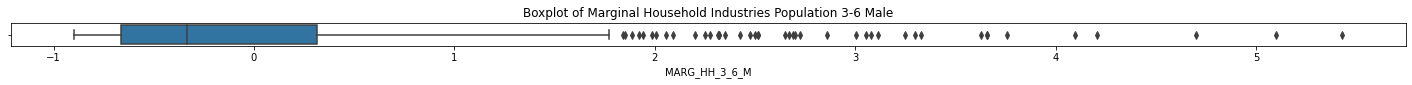

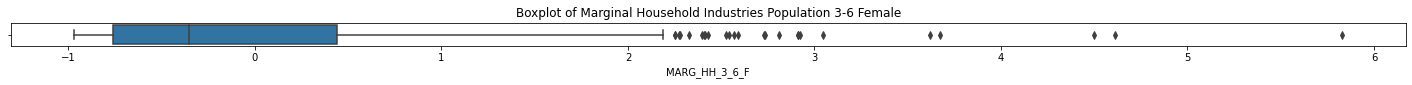

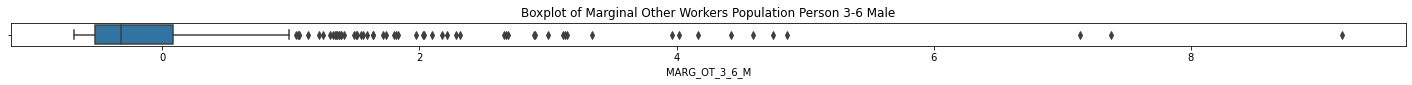

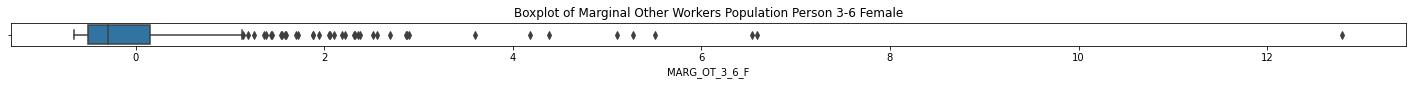

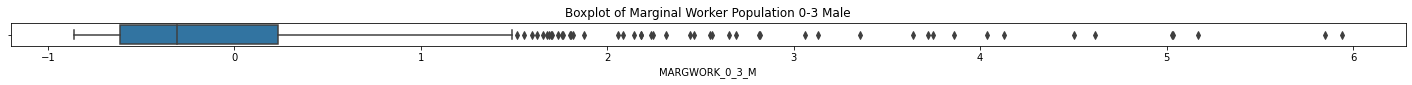

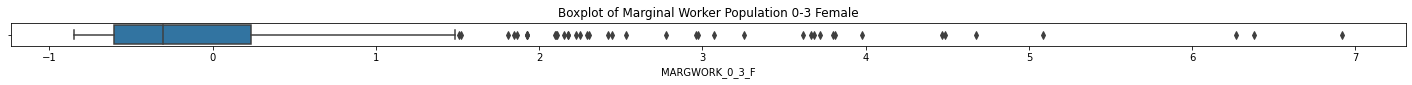

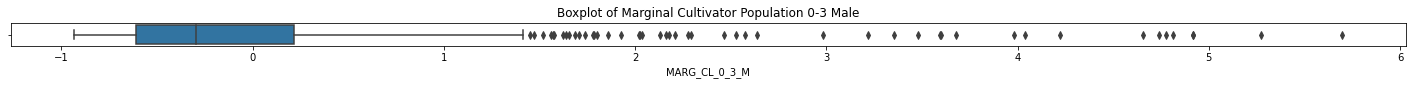

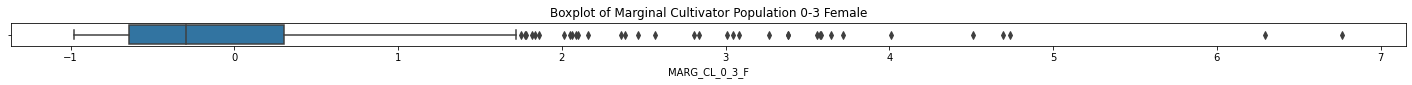

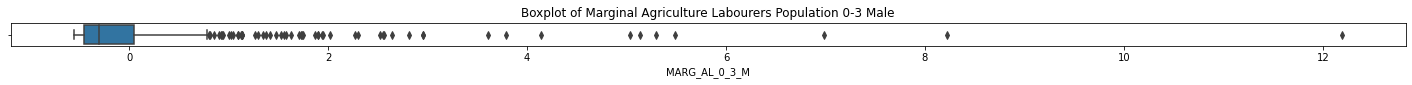

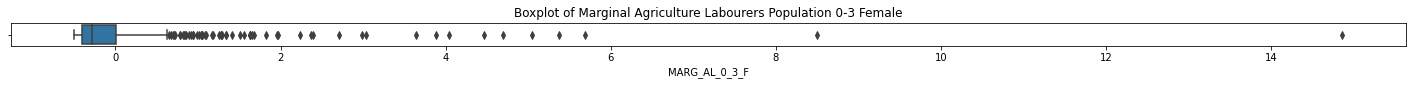

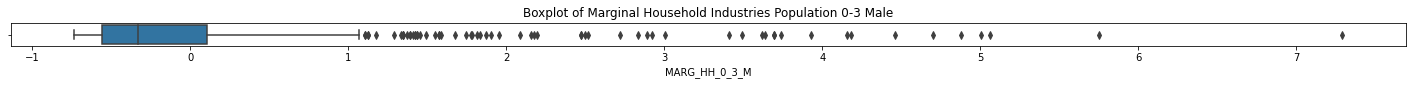

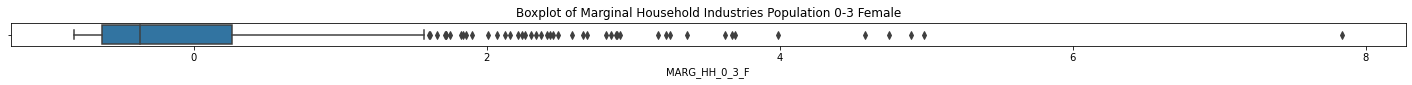

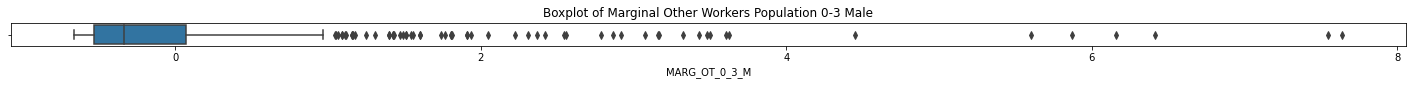

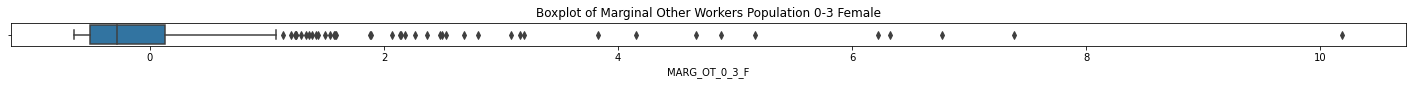

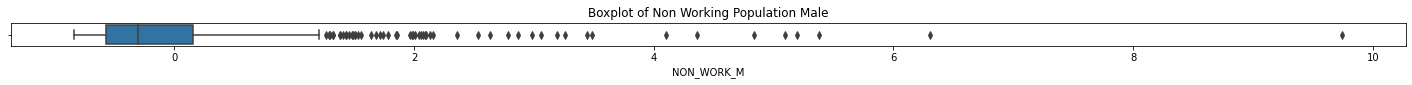

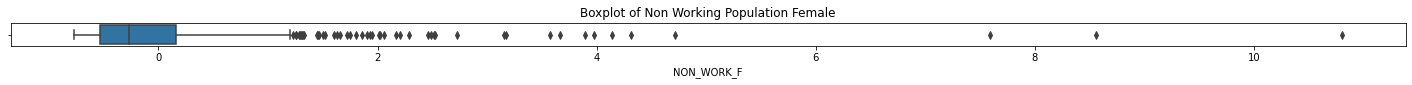

In [147]:
#Impact of scaling on outliers

for i in range (len(x)):
    plt.figure(figsize=(25,30))
    plt.subplot(60,1,i+1)
    sns.boxplot(pca_num_scaled[x[i]])
    plt.title("Boxplot of {}".format(dictionary[x[i]]))
    plt.tight_layout()

#### Thus from the above plot it is clear that scaling has no impact on outlier treatment

## Conducting PCA

### Statistical tests to be done before PCA

#### Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

- H0: All variables in the data are uncorrelated
- Ha: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [278]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square,p_val=calculate_bartlett_sphericity(pca_num_scaled)
p_val

0.0

#### Thus the p-test indicates there is significant amount of correlation in the data and the null hypothesis is thus rejected.

#### KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [282]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(pca_num_scaled)
kmo_model

0.9361896166653618

#### Thus there is significant scope for application of PCA

In [151]:
from sklearn.decomposition import PCA
pca=PCA(n_components=57,random_state=123)
pca_num_scaled_transformed=pca.fit_transform(pca_num_scaled)


#### Getting covariance matrix

In [160]:
pca_num_scaled_transformed
round(pd.DataFrame(pca_num_scaled_transformed),2).head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-4.62,0.14,0.33,1.54,0.35,-0.42,-0.01,0.48,0.05,-0.04,...,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
1,-4.77,-0.11,0.24,1.96,-0.15,0.42,-0.02,-0.01,0.42,-0.19,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
2,-5.96,-0.29,0.37,0.62,0.48,0.28,0.07,0.04,0.16,0.01,...,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
3,-6.28,-0.50,0.21,1.07,0.30,0.05,-0.25,0.08,0.15,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-4.48,0.89,1.08,0.54,0.80,0.34,-0.09,0.38,-0.07,0.20,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0


<AxesSubplot:>

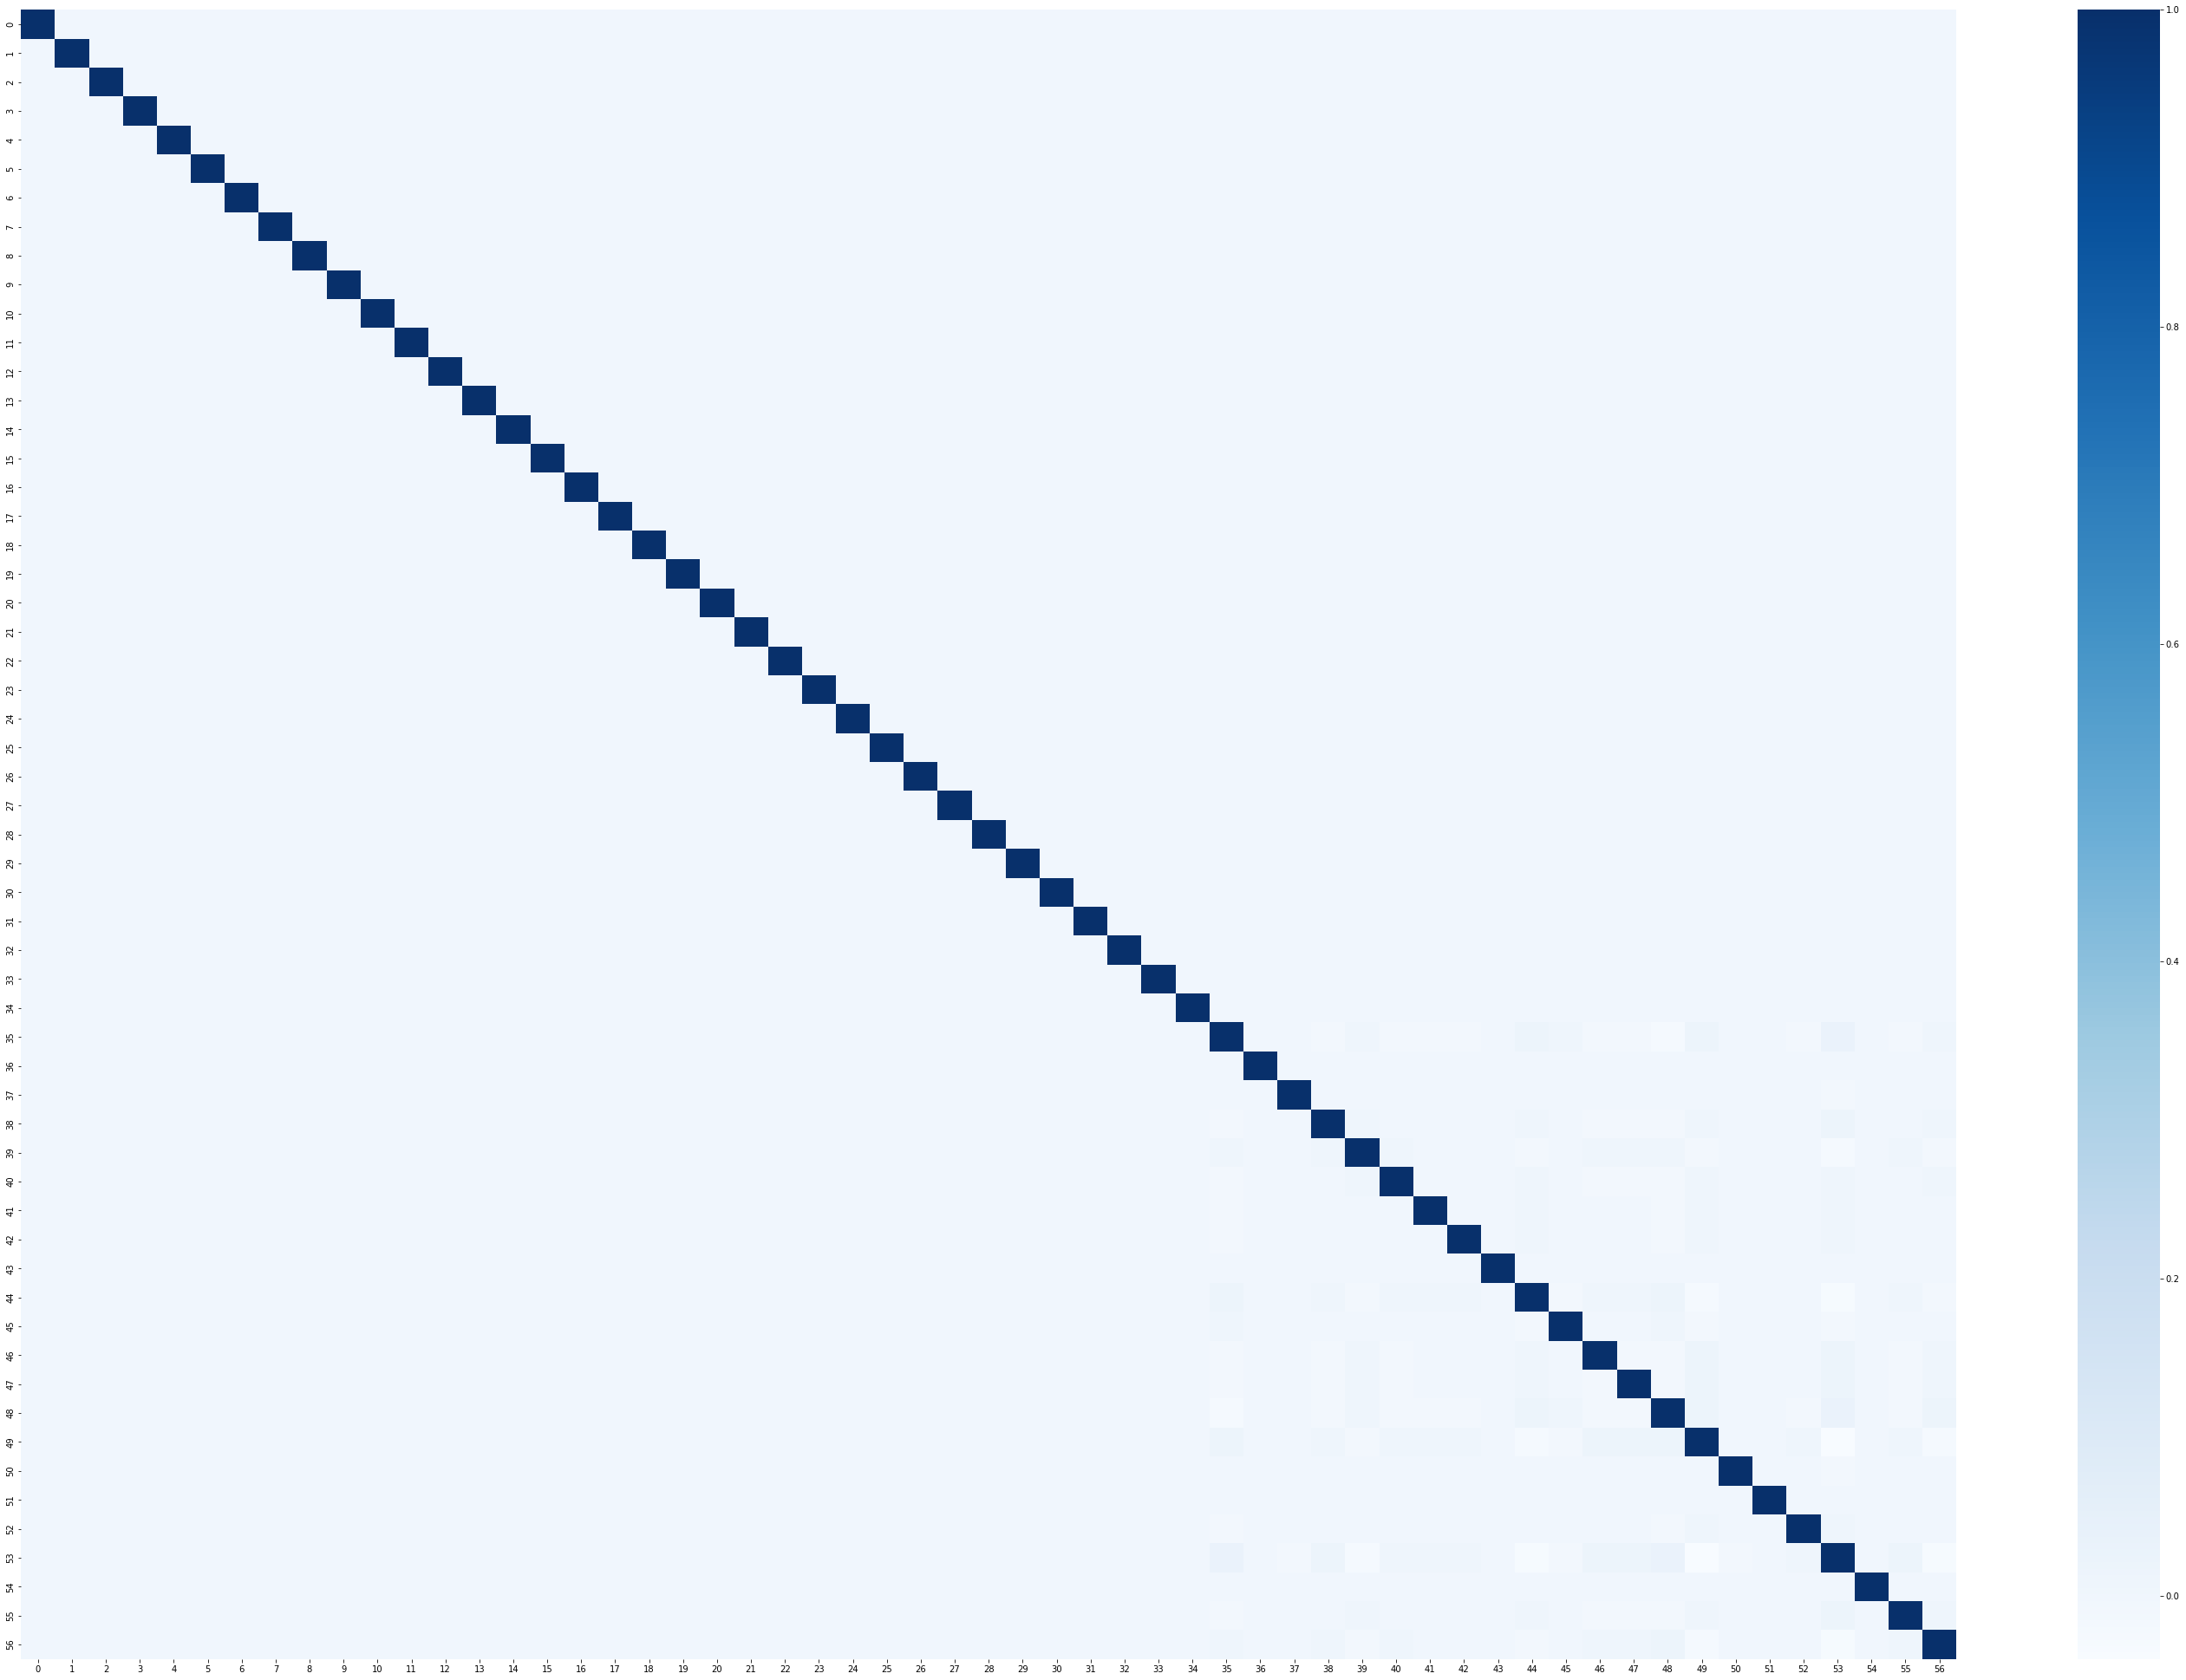

In [161]:
covar_matrix=pd.DataFrame(pca_num_scaled_transformed)
plt.figure(figsize=(50,35))
sns.heatmap(round(covar_matrix.corr(),2), cmap="Blues")

#### Thus it can be seen that there is no correlation between the PCs

#### Eigen vector- factor loadings

In [165]:
pca.components_
eig_vec=pd.DataFrame(pca.components_,index=["PC1","PC2", "PC3","PC4", "PC5","PC6", "PC7","PC8", "PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18", "PC19","PC20","PC21","PC22","PC23","PC24", "PC25","PC26","PC27","PC28", "PC29","PC30","PC31","PC32","PC33","PC34", "PC35","PC36", "PC37","PC38", "PC39","PC40", "PC41","PC42", "PC43","PC44", "PC45","PC46", "PC47","PC48", "PC49","PC50","PC51","PC52","PC53","PC54","PC55","PC56","PC57"])
round(eig_vec,2)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
PC1,0.16,0.17,0.17,0.16,0.16,0.15,0.15,0.03,0.03,0.16,...,0.15,0.14,0.05,0.04,0.12,0.12,0.14,0.13,0.15,0.13
PC2,-0.13,-0.09,-0.10,-0.02,-0.02,-0.05,-0.05,0.03,0.03,-0.12,...,0.15,0.18,0.25,0.24,0.19,0.18,0.08,0.05,-0.07,-0.07
PC3,-0.00,0.06,0.04,0.06,0.05,0.00,-0.03,-0.12,-0.14,0.08,...,0.05,0.02,0.27,0.28,-0.14,-0.20,-0.02,-0.08,0.11,0.10
PC4,-0.13,-0.02,-0.07,0.01,0.01,0.01,-0.03,-0.22,-0.23,-0.04,...,0.09,-0.02,-0.10,-0.14,0.13,0.00,0.23,0.21,0.08,0.02
PC5,-0.01,-0.03,-0.01,-0.05,-0.04,-0.17,-0.16,0.43,0.44,-0.01,...,0.08,0.13,-0.05,-0.05,0.06,0.13,-0.04,0.00,0.16,0.24
PC6,0.00,-0.07,-0.04,-0.16,-0.15,-0.06,-0.04,0.22,0.23,-0.06,...,-0.06,-0.00,0.07,0.08,-0.12,-0.11,0.06,0.30,-0.05,-0.02
PC7,-0.12,0.09,-0.00,0.17,0.17,-0.00,-0.08,0.41,0.36,0.05,...,-0.01,-0.20,-0.04,-0.10,0.01,-0.15,0.08,-0.07,-0.02,-0.20
PC8,0.06,0.11,0.09,0.17,0.17,-0.13,-0.14,0.02,0.01,0.10,...,0.03,0.00,0.08,0.06,0.14,0.07,-0.17,0.04,-0.12,-0.20
PC9,0.00,0.02,0.01,-0.06,-0.06,0.04,0.04,0.02,0.04,0.05,...,-0.01,-0.03,0.03,0.05,0.05,0.12,0.22,-0.08,-0.16,-0.35
PC10,0.02,-0.02,-0.04,-0.15,-0.17,0.45,0.45,0.16,0.13,-0.01,...,0.15,0.05,0.15,0.13,0.07,-0.04,-0.04,0.07,0.17,0.05


#### Eigen value

In [167]:
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

In [306]:
pca.explained_variance_ratio_

array([6.24441446e-01, 1.33888289e-01, 6.60229147e-02, 4.86470891e-02,
       3.34029704e-02, 2.02297994e-02, 1.73014629e-02, 8.13866529e-03,
       6.94892379e-03, 5.64637229e-03, 4.78562250e-03, 4.12770833e-03,
       3.17750294e-03, 2.96454958e-03, 2.42764517e-03, 2.30351534e-03,
       1.81837655e-03, 1.67340548e-03, 1.50392785e-03, 1.41732362e-03,
       1.15639919e-03, 1.10493400e-03, 8.45617224e-04, 8.04891611e-04,
       7.66778221e-04, 5.59369722e-04, 5.01311201e-04, 4.82545623e-04,
       4.10480504e-04, 3.85881758e-04, 3.28410688e-04, 2.78520087e-04,
       2.45156553e-04, 2.08299401e-04, 1.94666401e-04, 1.59021779e-04,
       1.27016642e-04, 1.09865556e-04, 8.68013375e-05, 8.06925096e-05,
       6.05897475e-05, 3.82574118e-05, 3.74001838e-05, 3.36510796e-05,
       2.51958296e-05, 1.92626466e-05, 1.69165450e-05, 1.51102177e-05,
       1.14143210e-05, 1.01010143e-05, 7.63350323e-06, 6.48174183e-06,
       5.37159674e-06, 3.64086663e-06, 2.42228792e-06, 1.57128566e-06,
      

In [170]:
p=np.cumsum(pca.explained_variance_ratio_)
p

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

### Plotting the scree plot

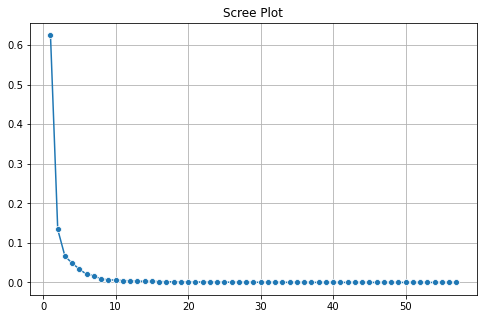

In [313]:
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_,x=np.arange(1,58),marker='o' )
plt.xlabel=('Number of components')
plt.ylabel=("Explained variance")
plt.title("Scree Plot")
plt.grid()
plt.show()

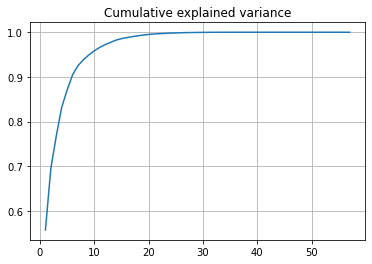

In [172]:
sns.lineplot(x=np.arange(1,58),y=p);
plt.title("Cumulative explained variance")
plt.grid()
plt.show()

#### thus the top five PCs contribute 90.60% of all the explained variances

### Performing PCA with top five components

In [384]:
pca_=PCA(n_components=5, random_state=123)
pca_num_scaled_transformed_top5=pca_.fit_transform(pca_num_scaled)
PD=pd.DataFrame(pca_num_scaled_transformed_top5, columns=['PC1','PC2','PC3','PC4','PC5'])
PD

,PC1,PC2,PC3,PC4,PC5
0,-4.617263,0.138116,0.328545,1.543697,0.353737
1,-4.771662,-0.105865,0.244449,1.963215,-0.153884
2,-5.964836,-0.294347,0.367393,0.619543,0.478199
3,-6.280796,-0.500384,0.212701,1.074516,0.300799
4,-4.478566,0.894154,1.078277,0.535556,0.804065
...,...,...,...,...,...
635,-6.262088,-0.854414,0.242575,1.174113,0.063816
636,-5.767714,-0.900436,0.168051,1.102774,0.055179
637,-6.294625,-0.638127,0.107483,1.368187,0.153745
638,-6.223192,-0.672320,0.271325,1.143493,0.060440


#### Comparing PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

#### identify which is explaining most variance

In [389]:
pca_extracted_loading=pd.DataFrame(pca_.components_.T,columns=['PC1','PC2','PC3','PC4','PC5'],index=pca_num.columns)
pca_extracted_loading

,PC1,PC2,PC3,PC4,PC5
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101


#### Comparing PCs with Actual Columns 

<AxesSubplot:>

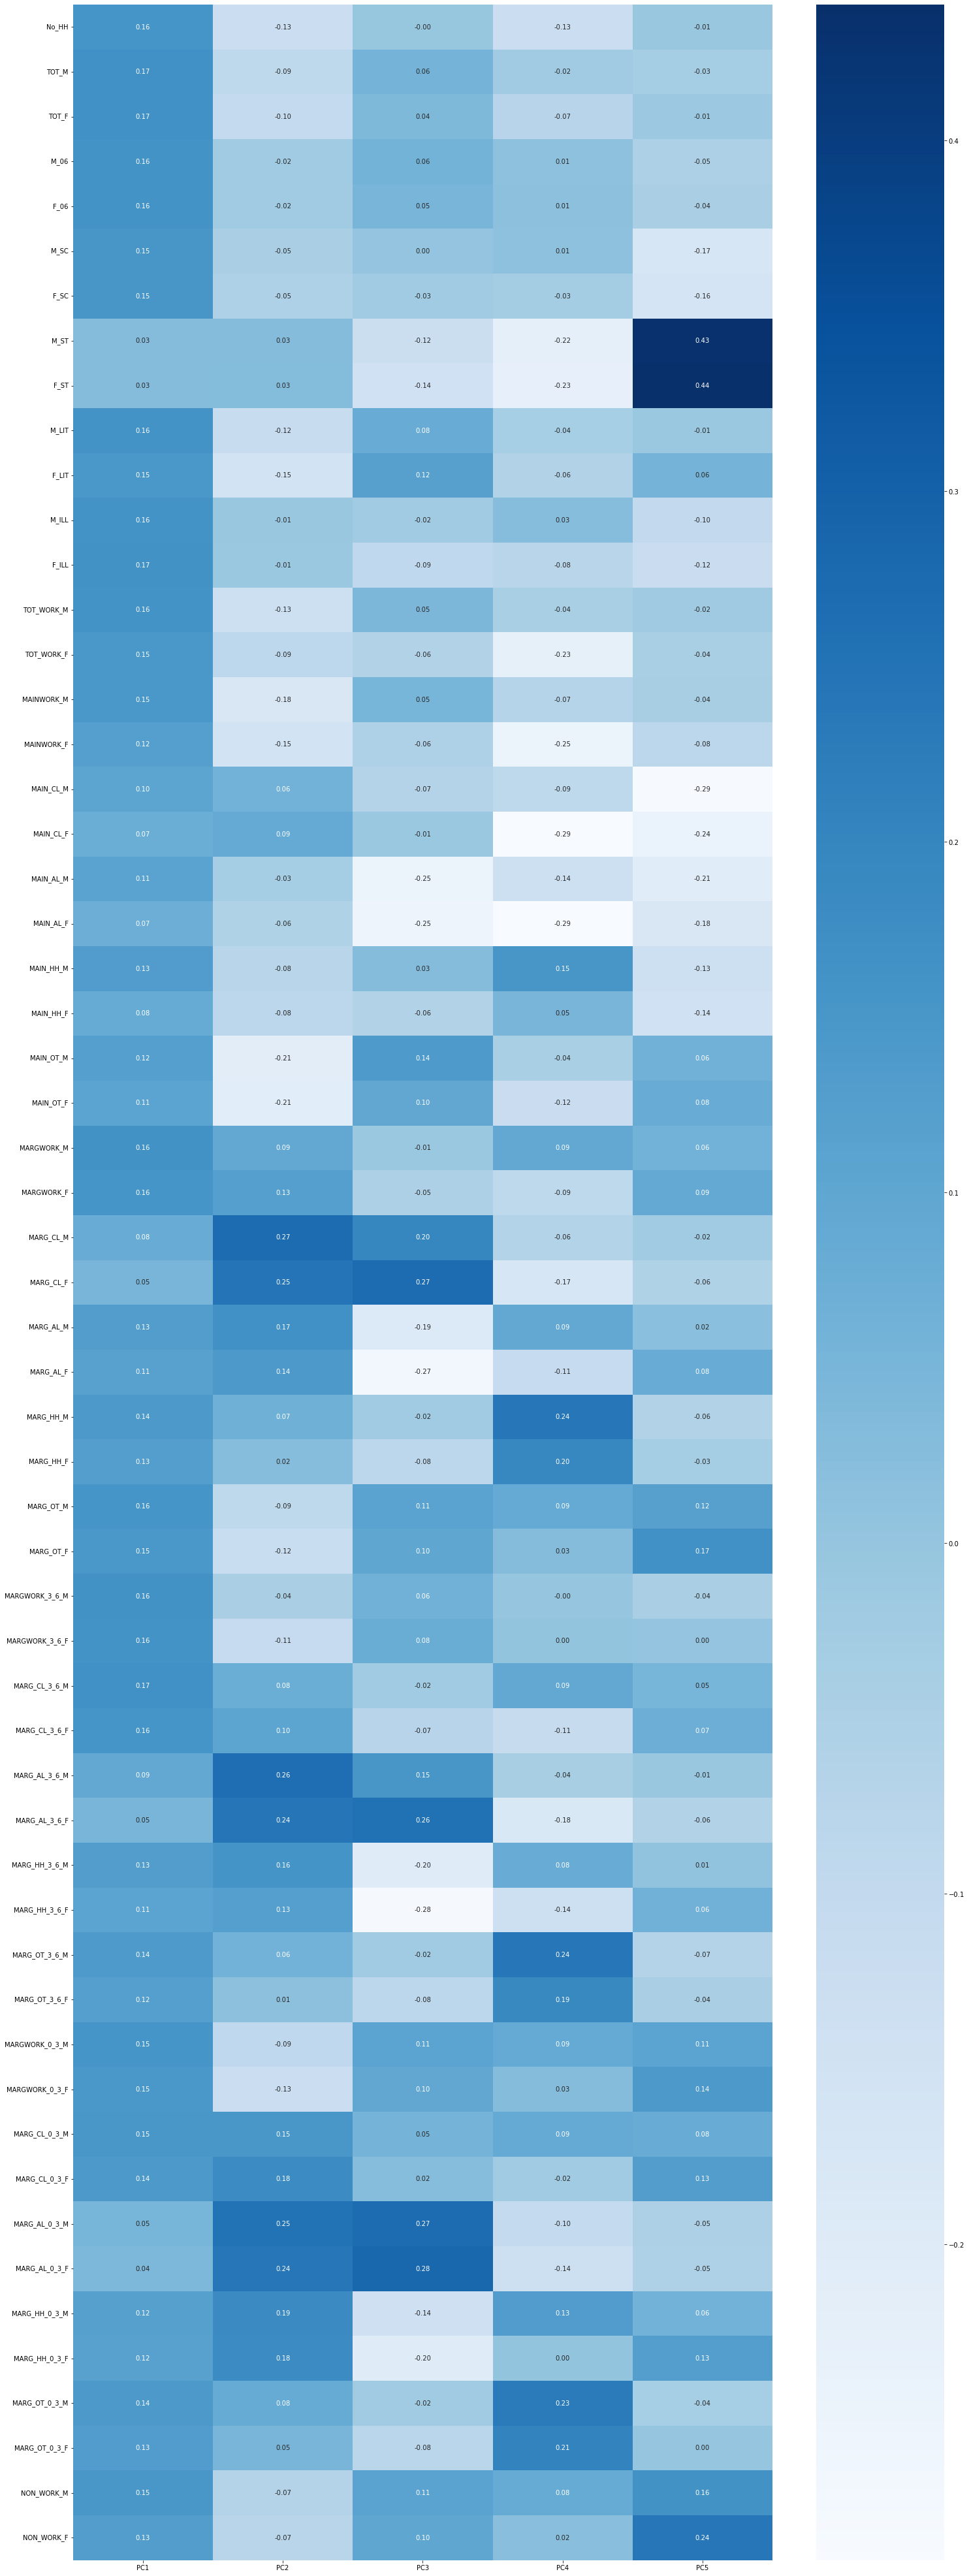

In [451]:
#Check as to how the original features matter to each PC
plt.figure(figsize=(24,72))
sns.heatmap(pca_extracted_loading,annot=True,cmap='Blues', fmt='.2f')

<AxesSubplot:>

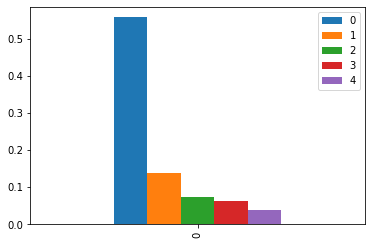

In [460]:
pd.DataFrame(pca_.explained_variance_ratio_).T.plot.bar()

In [461]:
pca_.explained_variance_ratio_

array([0.55726063, 0.13784435, 0.07275295, 0.06426418, 0.03865049])

In [462]:
np.cumsum(pca_.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261])

### Inferences about all the Principal components in terms of actual variables

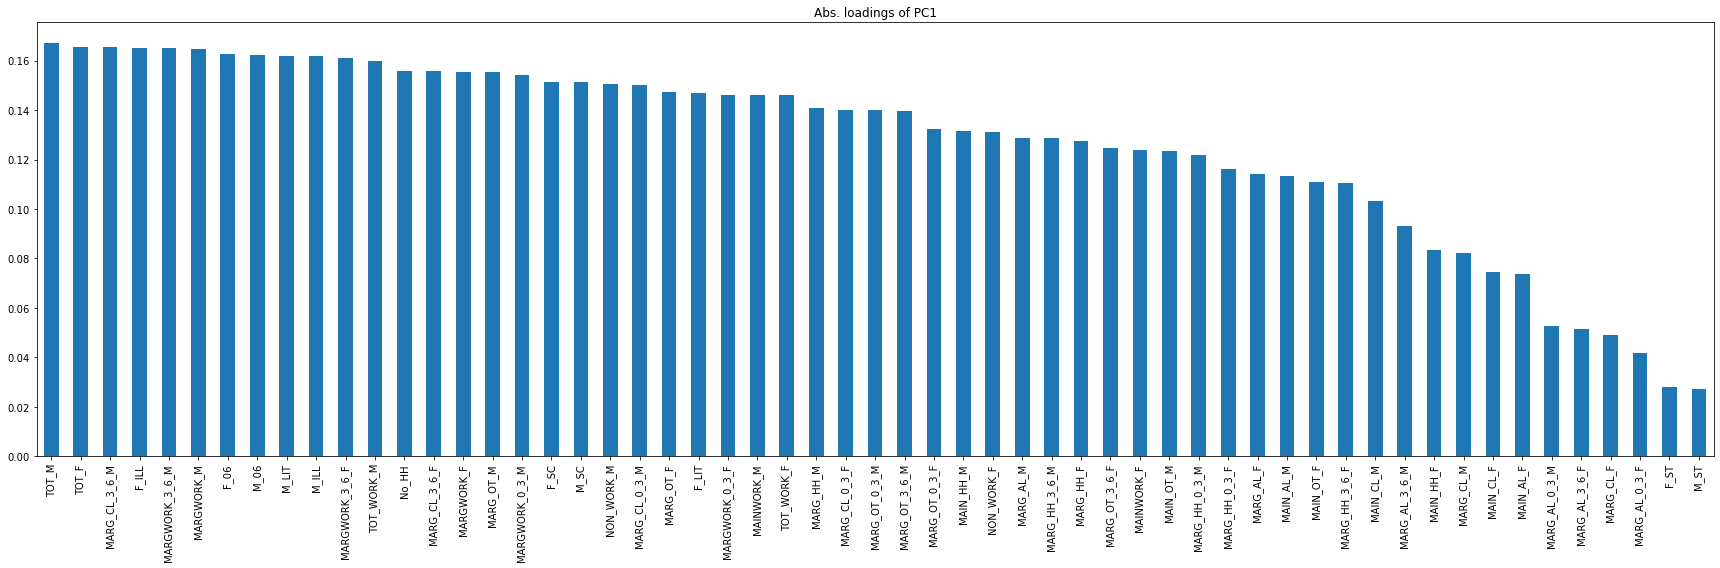

In [435]:
#Note: Here we are only considering the absolute values
x=pca_extracted_loading.columns
plt.figure(figsize=(24,8))
abs(pca_extracted_loading[pca_extracted_loading.columns[0]]).sort_values(ascending=False).plot.bar()
plt.title('Abs. loadings of {}'.format(pca_extracted_loading.columns[0]))
plt.tight_layout()

In [469]:
pd.DataFrame((pca_extracted_loading[pca_extracted_loading.columns[0]]).sort_values(ascending=False)).index

Index(['TOT_M', 'TOT_F', 'MARG_CL_3_6_M', 'F_ILL', 'MARGWORK_3_6_M',
       'MARGWORK_M', 'F_06', 'M_06', 'M_LIT', 'M_ILL', 'MARGWORK_3_6_F',
       'TOT_WORK_M', 'No_HH', 'MARG_CL_3_6_F', 'MARGWORK_F', 'MARG_OT_M',
       'MARGWORK_0_3_M', 'F_SC', 'M_SC', 'NON_WORK_M', 'MARG_CL_0_3_M',
       'MARG_OT_F', 'F_LIT', 'MARGWORK_0_3_F', 'MAINWORK_M', 'TOT_WORK_F',
       'MARG_HH_M', 'MARG_CL_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_3_6_M',
       'MARG_OT_0_3_F', 'MAIN_HH_M', 'NON_WORK_F', 'MARG_AL_M',
       'MARG_HH_3_6_M', 'MARG_HH_F', 'MARG_OT_3_6_F', 'MAINWORK_F',
       'MAIN_OT_M', 'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_AL_F', 'MAIN_AL_M',
       'MAIN_OT_F', 'MARG_HH_3_6_F', 'MAIN_CL_M', 'MARG_AL_3_6_M', 'MAIN_HH_F',
       'MARG_CL_M', 'MAIN_CL_F', 'MAIN_AL_F', 'MARG_AL_0_3_M', 'MARG_AL_3_6_F',
       'MARG_CL_F', 'MARG_AL_0_3_F', 'F_ST', 'M_ST'],
      dtype='object')

### Inference about Principal Component 1(PC1)

**Thus the first Principal component that explains 55.72% of total variance in the data is majorly influenced by the following parameters(top 5)
1.'TOT_M'-Total population Male
2.'TOT_F'-Total population Female
3.'MARG_CL_3_6_M'-Marginal Cultivator Population 3-6 Male
4.'F_ILL'-Illiterate Female
5.'MARGWORK_3_6_M'-Marginal Worker Population 3-6 Male


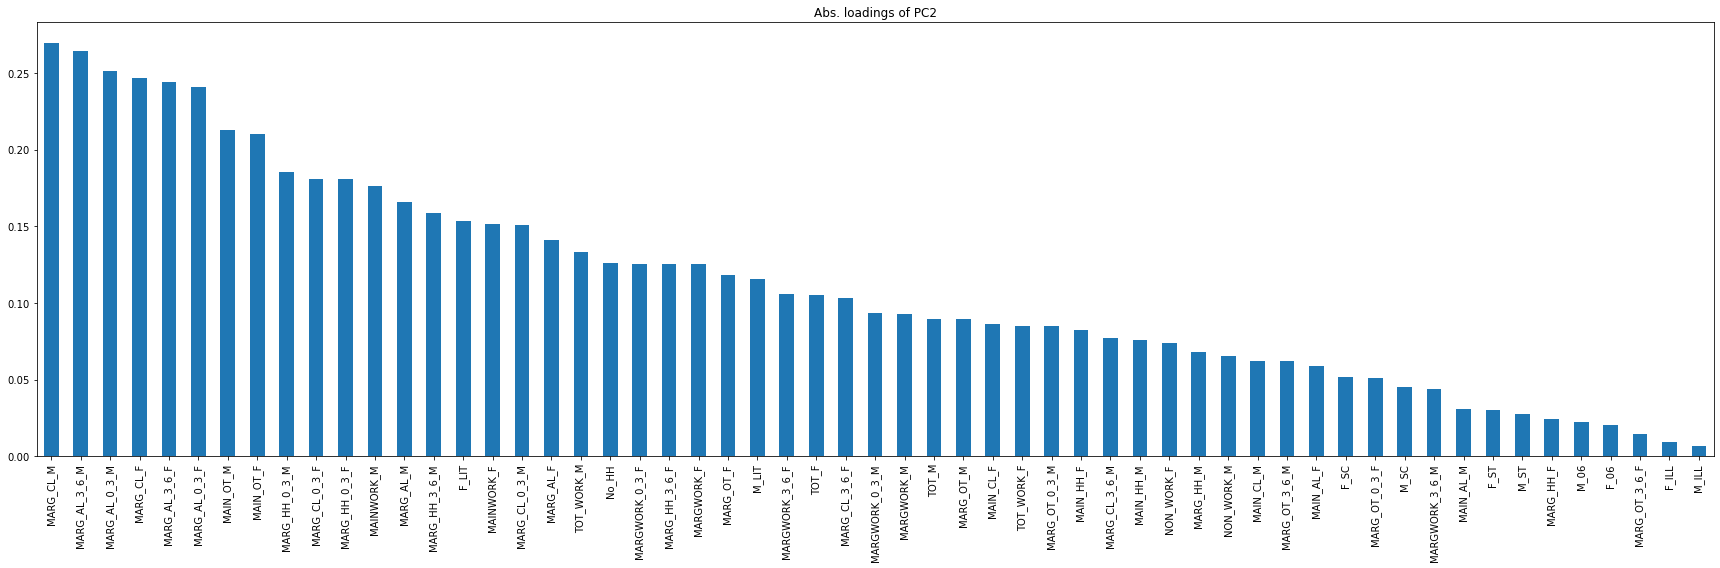

In [436]:
plt.figure(figsize=(24,8))
abs(pca_extracted_loading[pca_extracted_loading.columns[1]]).sort_values(ascending=False).plot.bar()
plt.title('Abs. loadings of {}'.format(pca_extracted_loading.columns[1]))
plt.tight_layout()

In [470]:
pd.DataFrame((pca_extracted_loading[pca_extracted_loading.columns[1]]).sort_values(ascending=False)).index

Index(['MARG_CL_M', 'MARG_AL_3_6_M', 'MARG_AL_0_3_M', 'MARG_CL_F',
       'MARG_AL_3_6_F', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M', 'MARG_CL_0_3_F',
       'MARG_HH_0_3_F', 'MARG_AL_M', 'MARG_HH_3_6_M', 'MARG_CL_0_3_M',
       'MARG_AL_F', 'MARG_HH_3_6_F', 'MARGWORK_F', 'MARG_CL_3_6_F',
       'MARGWORK_M', 'MAIN_CL_F', 'MARG_OT_0_3_M', 'MARG_CL_3_6_M',
       'MARG_HH_M', 'MAIN_CL_M', 'MARG_OT_3_6_M', 'MARG_OT_0_3_F', 'F_ST',
       'M_ST', 'MARG_HH_F', 'MARG_OT_3_6_F', 'M_ILL', 'F_ILL', 'F_06', 'M_06',
       'MAIN_AL_M', 'MARGWORK_3_6_M', 'M_SC', 'F_SC', 'MAIN_AL_F',
       'NON_WORK_M', 'NON_WORK_F', 'MAIN_HH_M', 'MAIN_HH_F', 'TOT_WORK_F',
       'MARG_OT_M', 'TOT_M', 'MARGWORK_0_3_M', 'TOT_F', 'MARGWORK_3_6_F',
       'M_LIT', 'MARG_OT_F', 'MARGWORK_0_3_F', 'No_HH', 'TOT_WORK_M',
       'MAINWORK_F', 'F_LIT', 'MAINWORK_M', 'MAIN_OT_F', 'MAIN_OT_M'],
      dtype='object')

### Inference about Principal Component 2(PC2)

**Thus the first Principal component that explains 13.78% of total variance in the data is majorly influenced by the following parameters(top 5)
1.'MARG_CL_M'-Marginal Cultivator Population Male
2.'MARG_CL_3_6_M'-Marginal Cultivator Population 3-6 Male
3.'MARG_AL_0_3_M'-Marginal Agriculture Labourers Population 0-3 Male
4.MARG_CL_F-Marginal Cultivator Population Female
5.MARG_AL_3_6_F-Marginal Agriculture Labourers Population 3-6 Female

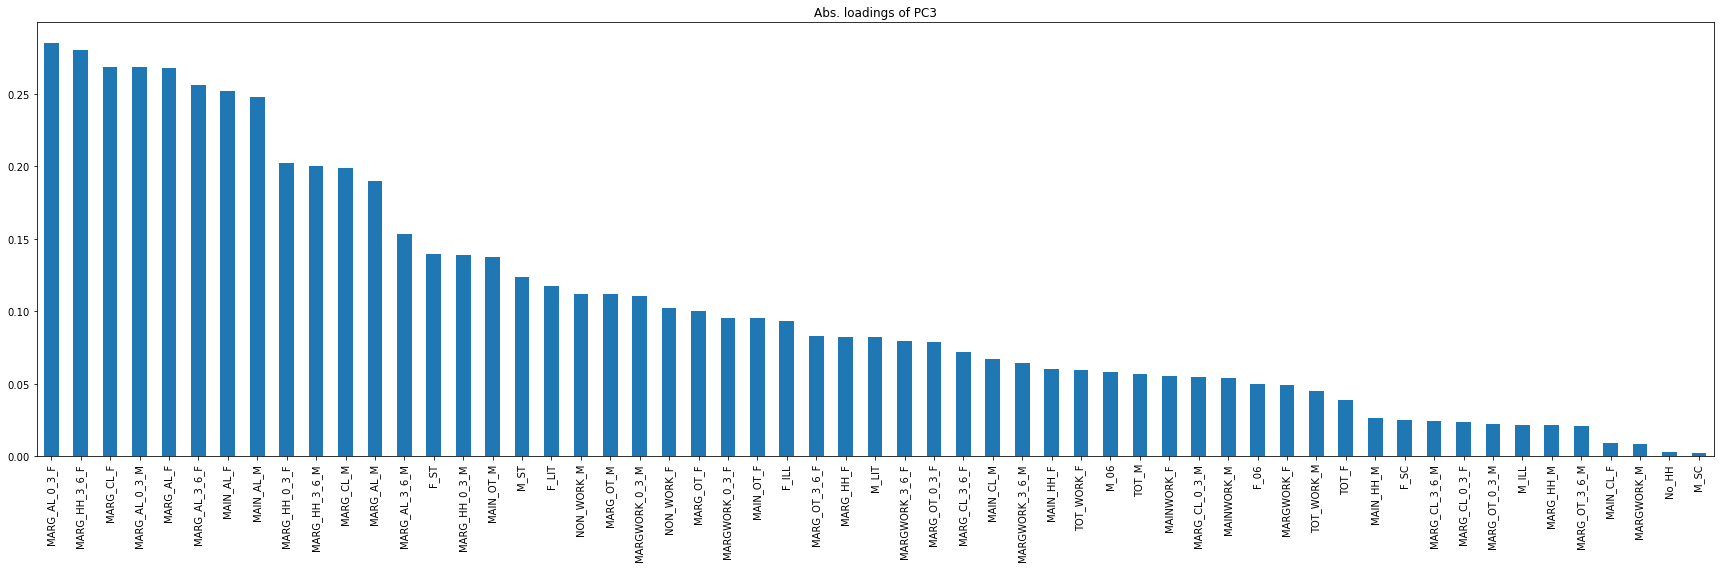

In [437]:
plt.figure(figsize=(24,8))
abs(pca_extracted_loading[pca_extracted_loading.columns[2]]).sort_values(ascending=False).plot.bar()
plt.title('Abs. loadings of {}'.format(pca_extracted_loading.columns[2]))
plt.tight_layout()

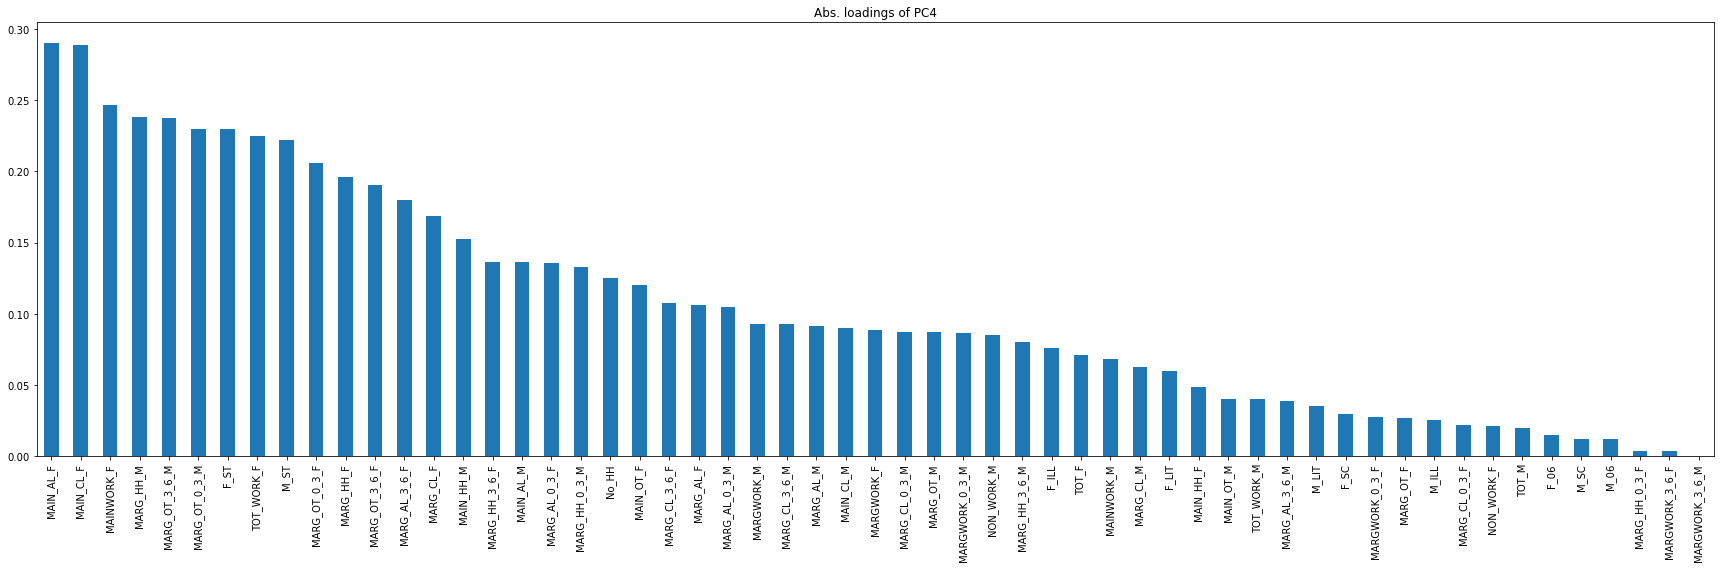

In [439]:
plt.figure(figsize=(24,8))
abs(pca_extracted_loading[pca_extracted_loading.columns[3]]).sort_values(ascending=False).plot.bar()
plt.title('Abs. loadings of {}'.format(pca_extracted_loading.columns[3]))
plt.tight_layout()

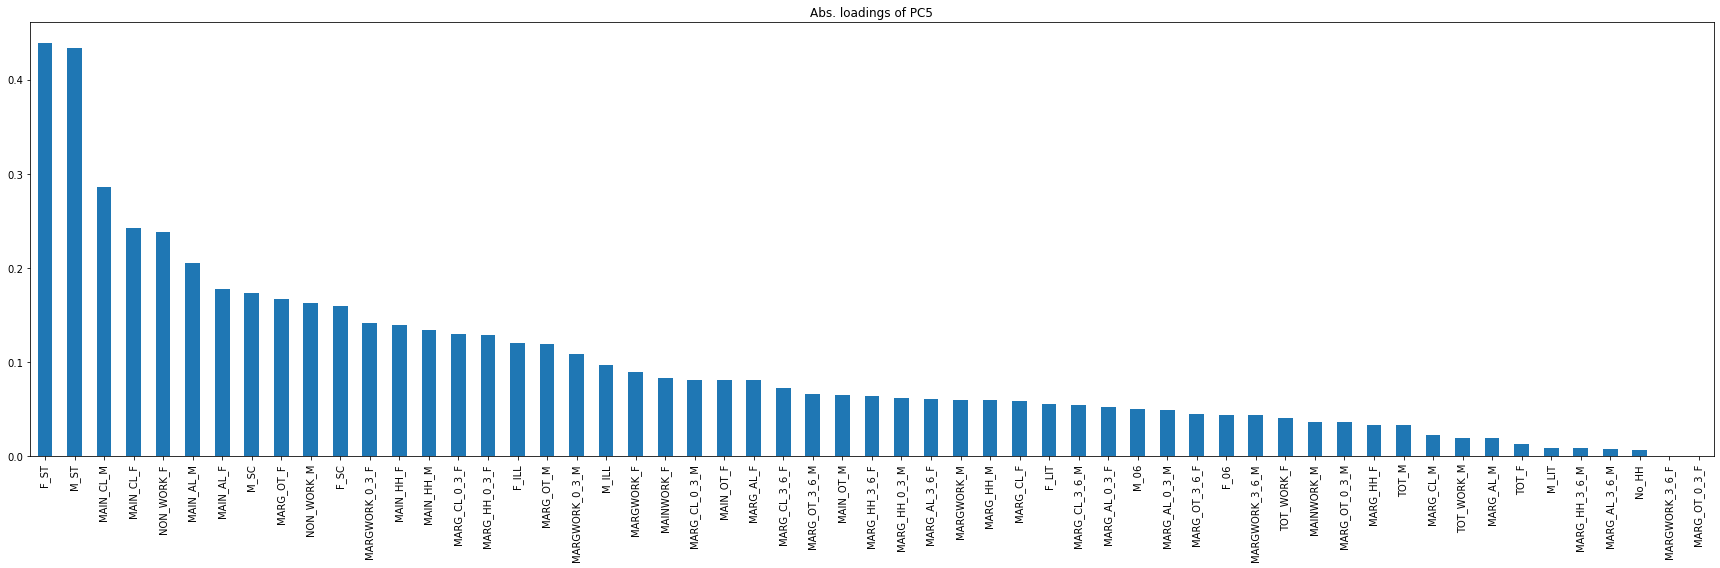

In [440]:
plt.figure(figsize=(24,8))
abs(pca_extracted_loading[pca_extracted_loading.columns[4]]).sort_values(ascending=False).plot.bar()
plt.title('Abs. loadings of {}'.format(pca_extracted_loading.columns[4]))
plt.tight_layout()

### Write linear equation for first PC

In [513]:
#First is to get the loading score for the first PC:
a=pca_extracted_loading["PC1"].index
b=(pca_extracted_loading["PC1"])
print("The equation for PC1 is\n PC1=")

for i in a :
    
    
    print ("  {} * {} +  ".format(i,round((b.get(key=i)),2)))



The equation for PC1 is
 PC1=
  No_HH * 0.16 +  
  TOT_M * 0.17 +  
  TOT_F * 0.17 +  
  M_06 * 0.16 +  
  F_06 * 0.16 +  
  M_SC * 0.15 +  
  F_SC * 0.15 +  
  M_ST * 0.03 +  
  F_ST * 0.03 +  
  M_LIT * 0.16 +  
  F_LIT * 0.15 +  
  M_ILL * 0.16 +  
  F_ILL * 0.17 +  
  TOT_WORK_M * 0.16 +  
  TOT_WORK_F * 0.15 +  
  MAINWORK_M * 0.15 +  
  MAINWORK_F * 0.12 +  
  MAIN_CL_M * 0.1 +  
  MAIN_CL_F * 0.07 +  
  MAIN_AL_M * 0.11 +  
  MAIN_AL_F * 0.07 +  
  MAIN_HH_M * 0.13 +  
  MAIN_HH_F * 0.08 +  
  MAIN_OT_M * 0.12 +  
  MAIN_OT_F * 0.11 +  
  MARGWORK_M * 0.16 +  
  MARGWORK_F * 0.16 +  
  MARG_CL_M * 0.08 +  
  MARG_CL_F * 0.05 +  
  MARG_AL_M * 0.13 +  
  MARG_AL_F * 0.11 +  
  MARG_HH_M * 0.14 +  
  MARG_HH_F * 0.13 +  
  MARG_OT_M * 0.16 +  
  MARG_OT_F * 0.15 +  
  MARGWORK_3_6_M * 0.16 +  
  MARGWORK_3_6_F * 0.16 +  
  MARG_CL_3_6_M * 0.17 +  
  MARG_CL_3_6_F * 0.16 +  
  MARG_AL_3_6_M * 0.09 +  
  MARG_AL_3_6_F * 0.05 +  
  MARG_HH_3_6_M * 0.13 +  
  MARG_HH_3_6_F * 0.11 +  
